# Price Optimisation based on price elasticity of Demand

Pricing a product is a crucial aspect in any business. Alot of thought process is out into it. There are different strategies to price different kinds of products. There are products whose sales are quite sensitive to their prices and as such a small change in their price can lead to noticeable change in their sales. While there are products whose sales are not much affected by their price - these tend to be either luxury items or necessities (like certain medicines). This notebook will focus on the former type of products.

Price elasticity of demand (Epd), or elasticity, is the degree to which the effective desire for something changes as its price changes. In general, people desire things less as those things become more expensive. However, for some products, the customer's desire could drop sharply even with a little price increase, and for other products, it could stay almost the same even with a big price increase. Economists use the term elasticity to denote this sensitivity to price increases. More precisely, price elasticity gives the percentage change in quantity demanded when there is a one percent increase in price, holding everything else constant.

Mathematically speaking, the price elasticity of demand is defined to be the percentage change in quantity demanded, q,divided by the percentage change in price, p. The formula for the price elasticity (ǫ) is: $$e = \%ΔQ/ \%ΔP$$


In this work, we shall look at the sales of the items of a Retail store. This retail sells Coffees, Coke, Sparkling Water and Nuts. As a data scientist, it is our task to figure out the optimal prices to set for these items. If the price is set too high, the sales will drop & the price is set to low, then the margins will decrease. What is the sweet spot that will give us the maximum profit?

In [ ]:
# install the required packages
!pip install pandas==1.1.5
!pip install numpy==1.19.5
!pip install statsmodels==0.10.2
!pip install  matplotlib==3.2.2
!pip install seaborn==0.11.1

In [1]:
# Import the reqiured libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [2]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.reset_option('all')

# Load the data

In [4]:
# load the datasets
sold = pd.read_csv('Retail_Sell_Meta_Data.csv')
transactions = pd.read_csv('Retail_Transaction_Store.csv')
date_info = pd.read_csv('Retail_DateInfo.csv')

In [5]:
transactions.groupby('SELL_ID').min()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_CATEGORY
SELL_ID,,,,
1070,01/01/12,12.64,18,0
2051,01/01/12,10.97,12,2
2052,01/01/12,10.12,8,2
2053,01/01/12,10.45,20,2


In [6]:
sold

,Unnamed: 0,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,0,1070,0,7821,Coffee
1,1,3055,0,3052,Nuts
2,2,3067,0,5030,Coke
3,3,3028,0,6249,Sparkling Water
4,4,2051,2,7821,Coffee
5,5,2051,2,5030,Coke
6,6,2052,2,7821,Coffee
7,7,2052,2,6249,Sparkling Water
8,8,2053,2,7821,Coffee
9,9,2053,2,5030,Coke


In [7]:
date_info.columns

Index(['CALENDAR_DATE', 'YEAR', 'HOLIDAY', 'IS_WEEKEND', 'IS_SCHOOLBREAK',
       'AVERAGE_TEMPERATURE', 'IS_OUTDOOR'],
      dtype='object')

In [8]:
transactions[['CALENDAR_DATE','PRICE']].head()

,CALENDAR_DATE,PRICE
0,01/01/12,15.50
1,01/01/12,12.73
2,01/01/12,12.75
3,01/01/12,12.60
4,01/02/12,15.50


<AxesSubplot: xlabel='PRICE', ylabel='Count'>

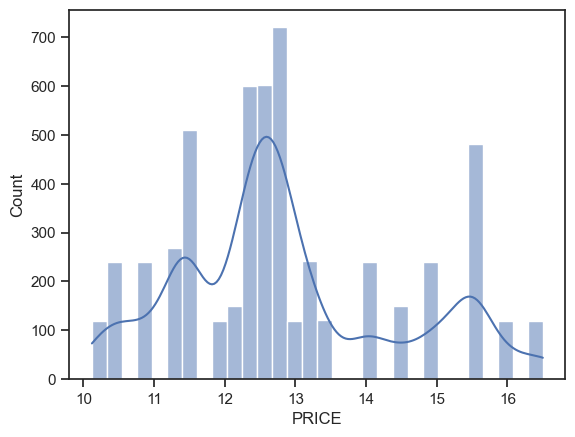

In [9]:
sns.histplot(transactions['PRICE'], bins=30, kde=True)

In [10]:
# check for first 5 rows
sold.head()

,Unnamed: 0,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,0,1070,0,7821,Coffee
1,1,3055,0,3052,Nuts
2,2,3067,0,5030,Coke
3,3,3028,0,6249,Sparkling Water
4,4,2051,2,7821,Coffee


In [11]:
# describe 
sold.describe()
sold.describe(include = ['O']) 

,ITEM_NAME
count,11
unique,4
top,Coffee
freq,4


In [12]:
# check for null
sold[sold.isnull().any(axis=1)]

,Unnamed: 0,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


SELL_ID: a categorical variable, identifier of the combination of items that is contained in the product.

SELL_CATEGORY: “0” identifies single products; the category “2” identifies the combo ones.

ITEM_ID: a categorical variable, identifier of the item that is contained in the product.

ITEM_NAME: a categorical variable, identifying the name of the item

In [13]:
sold

,Unnamed: 0,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,0,1070,0,7821,Coffee
1,1,3055,0,3052,Nuts
2,2,3067,0,5030,Coke
3,3,3028,0,6249,Sparkling Water
4,4,2051,2,7821,Coffee
5,5,2051,2,5030,Coke
6,6,2052,2,7821,Coffee
7,7,2052,2,6249,Sparkling Water
8,8,2053,2,7821,Coffee
9,9,2053,2,5030,Coke


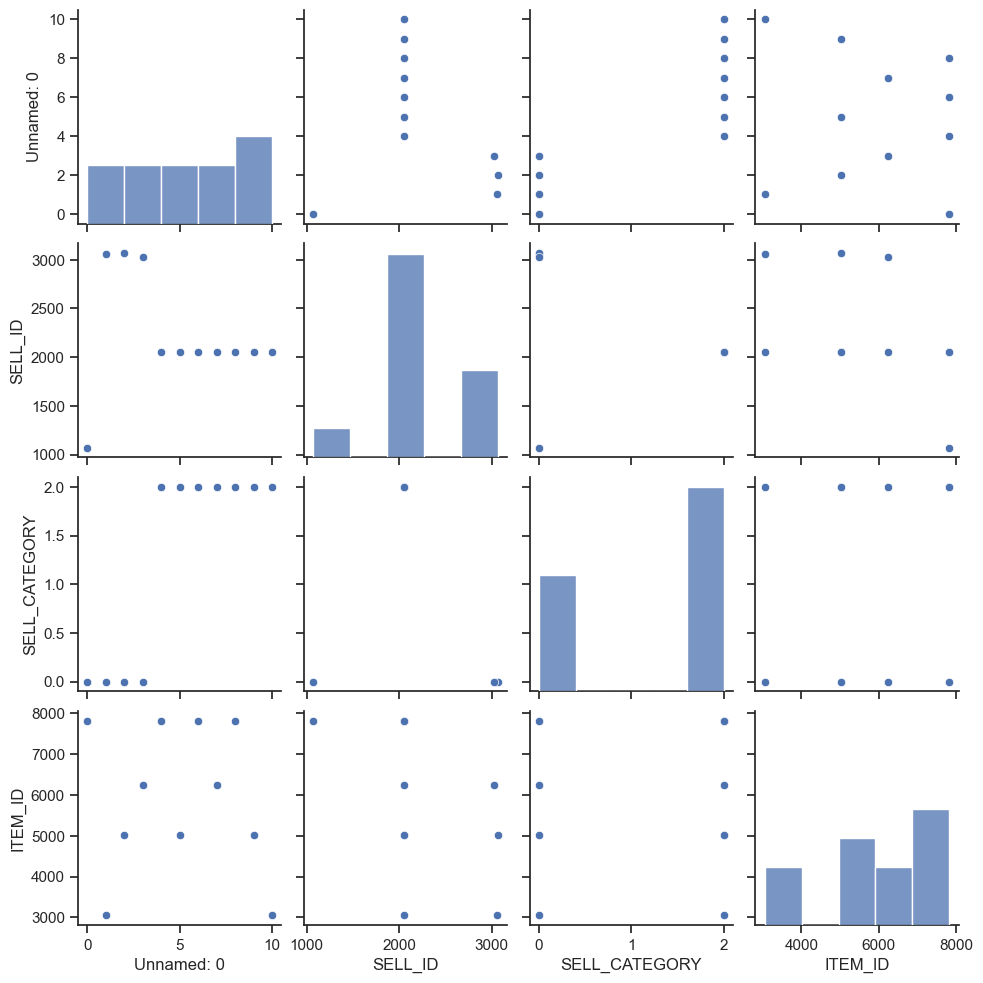

In [14]:
# plot a pairplot for the data
sns.pairplot(sold)

In [15]:
# check for first 5 rows
transactions.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [16]:
# describe
transactions.describe()
transactions.describe(include = ['O'])

,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [17]:
transactions[transactions['SELL_ID']==1070]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.5,46,1070,0
4,01/02/12,15.5,70,1070,0
8,01/03/12,15.5,62,1070,0
12,01/04/12,15.5,88,1070,0
16,01/05/12,15.5,104,1070,0
...,...,...,...,...,...
5384,09/06/15,14.5,94,1070,0
5388,09/07/15,14.5,98,1070,0
5392,09/08/15,14.5,90,1070,0
5396,09/09/15,14.5,96,1070,0


In [18]:
# check for nulls
transactions[transactions.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


Important: It’s supposed the PRICE for that product in that day will not vary.

In details:
CALENDAR_DATE: a date/time variable, having the time always set to 00:00 AM.

PRICE: a numeric variable, associated with the price of the product identified by the SELL_ID.

QUANTITY: a numeric variable, associated with the quantity of the product sold, identified by the SELL_ID.

SELL_ID: a categorical variable, identifier of the product sold.

SELL_CATEGORY: a categorical variable, category of the product sold.

(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

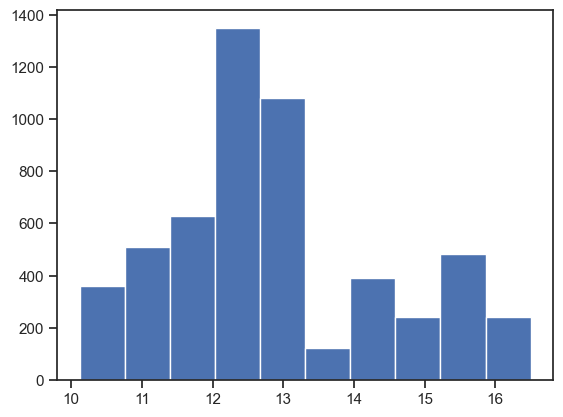

In [19]:
# plot histogram to check data distribution
plt.hist(transactions.PRICE)

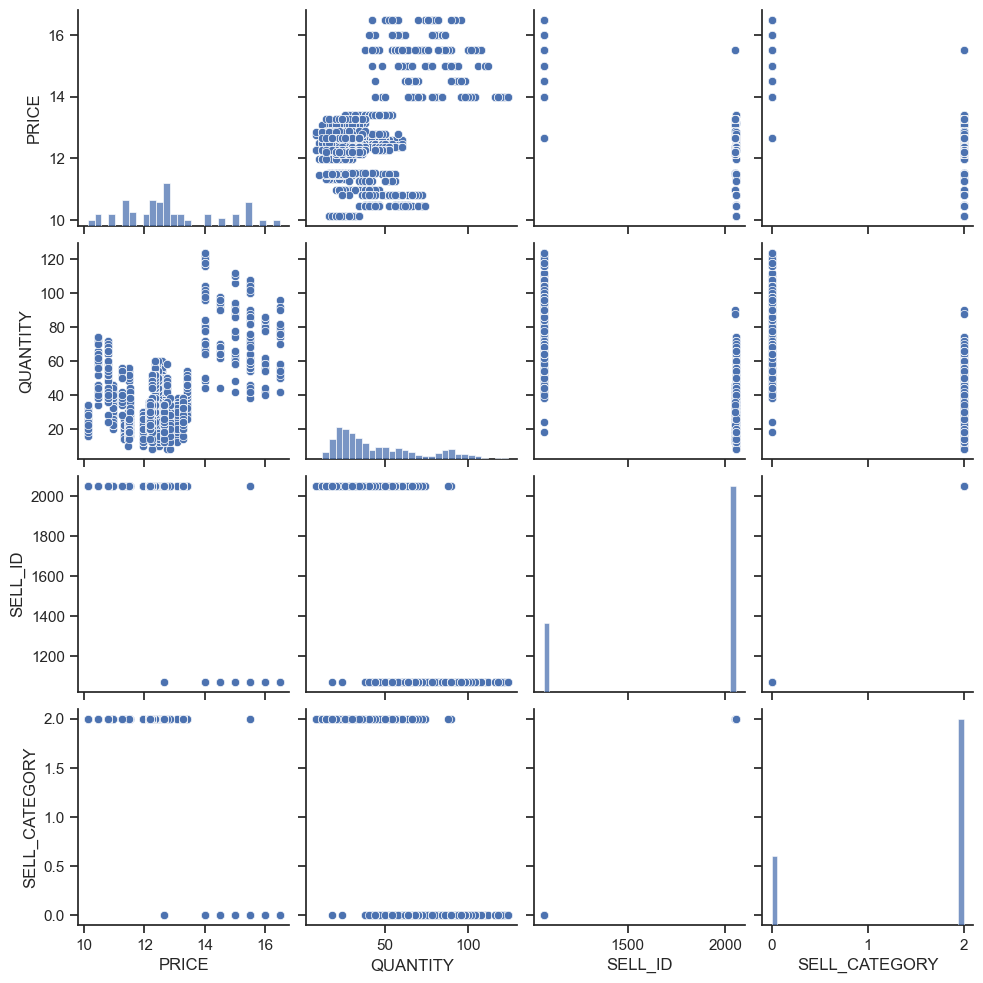

In [20]:
# plot a pairplot for the data
sns.pairplot(transactions)

In [21]:
# check for first 5 rows
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [22]:
# describe
date_info.describe()
date_info.describe(include = ['O'])

,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [23]:
# check datatypes
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [24]:
# check for null
date_info[date_info.isnull().any(axis=1)].head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0


In [25]:
# null value imputation
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")

In [26]:
date_info["HOLIDAY"].unique()

array(['New Year', 'No Holiday', 'Luner New Year', 'Qing Ming Festival',
       'Labor Day', 'Dragon Boat Festivel', 'Mid-Autumn Day',
       'National Day', 'WWII Celebration'], dtype=object)

In [27]:
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No Holiday,0,0,32.0,1
4,1/5/12,2012,No Holiday,0,0,24.8,0


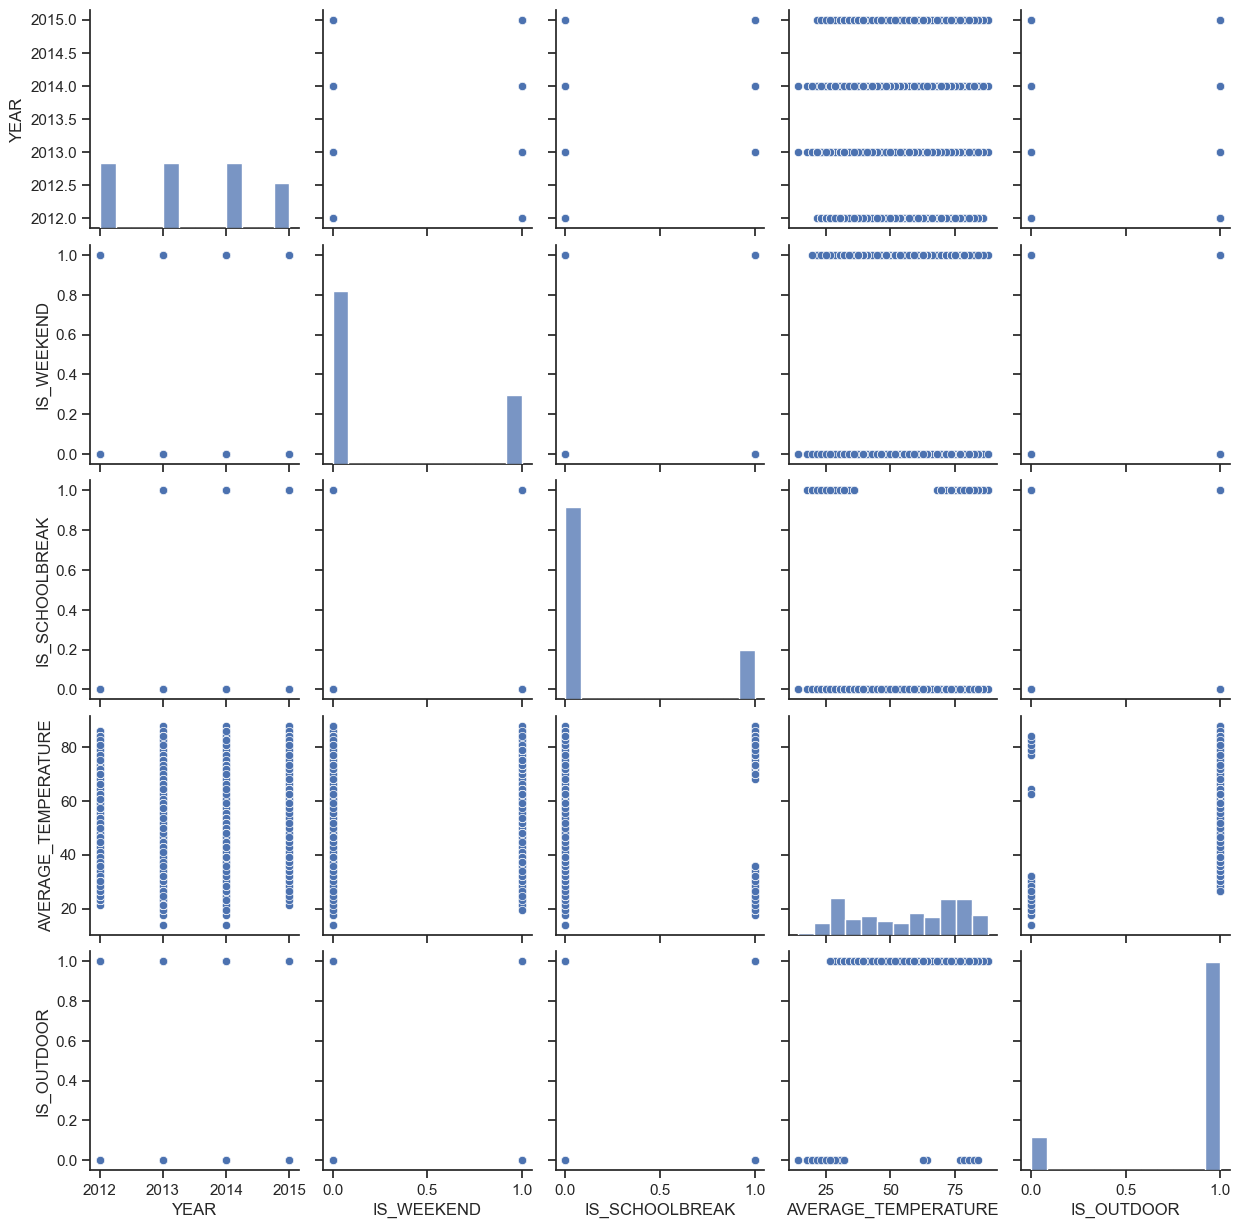

In [28]:
# pairplot 
sns.pairplot(date_info)

# Understanding the data better

In [29]:
# check for unique values
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [30]:
# minimum date
date_info['CALENDAR_DATE'].min()

'1/1/12'

In [31]:
# maximum date
date_info['CALENDAR_DATE'].max()

'9/9/15'

In [32]:
# shape of data
date_info.shape

(1349, 7)

In [33]:
# check for null
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [34]:
# ------------------------------------------------------------------------------------------------------

In [35]:
sold.head()

,Unnamed: 0,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,0,1070,0,7821,Coffee
1,1,3055,0,3052,Nuts
2,2,3067,0,5030,Coke
3,3,3028,0,6249,Sparkling Water
4,4,2051,2,7821,Coffee


In [36]:
sold['SELL_ID'].unique()

array([1070, 3055, 3067, 3028, 2051, 2052, 2053])

In [37]:
# concatenate the data
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,Coffee,Coke,Nuts,Sparkling Water
0,1070,1,0,0,0
1,3055,0,0,1,0
2,3067,0,1,0,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,1,0,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,1,0,0


In [38]:

pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

,SELL_ID,Coffee,Coke,Nuts,Sparkling Water
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,1,0,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,0,1,0
3067,3067,0,1,0,0


In [39]:
# merge the data
data1 = pd.merge(sold.drop(['ITEM_ID'],axis=1), transactions.drop(['SELL_CATEGORY'], axis= 1), on =  'SELL_ID')
data1.head(20)
b = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()

In [40]:
b

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              Coffee     01/01/12       15.50    46
                                   01/01/13       15.50    60
                                   01/01/14       15.50    72
                                   01/01/15       14.00    66
                                   01/02/12       15.50    70
                                                           ..
2053     2              Nuts       9/29/13        10.45    40
                                   9/29/14        12.77    46
                                   9/30/12        12.42    38
                                   9/30/13        10.45    38
                                   9/30/14        12.77    50
Name: QUANTITY, Length: 10792, dtype: int64

In [41]:
data1.shape # check the shape
intermediate_data = b.reset_index()

In [42]:
data1.shape # check the shape

(10808, 7)

In [43]:
b.shape # check the shape 

(10792,)

In [44]:
# first 5 rows
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,Coffee,01/01/12,15.5,46
1,1070,0,Coffee,01/01/13,15.5,60
2,1070,0,Coffee,01/01/14,15.5,72
3,1070,0,Coffee,01/01/15,14.0,66
4,1070,0,Coffee,01/02/12,15.5,70


In [45]:
data1

,Unnamed: 0,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,0,1070,0,Coffee,01/01/12,15.50,46
1,0,1070,0,Coffee,01/02/12,15.50,70
2,0,1070,0,Coffee,01/03/12,15.50,62
3,0,1070,0,Coffee,01/04/12,15.50,88
4,0,1070,0,Coffee,01/05/12,15.50,104
...,...,...,...,...,...,...,...
10803,10,2053,2,Nuts,09/06/15,11.26,54
10804,10,2053,2,Nuts,09/07/15,11.26,50
10805,10,2053,2,Nuts,09/08/15,11.26,50
10806,10,2053,2,Nuts,09/09/15,11.26,54


In [46]:
# check the minimum date
intermediate_data['CALENDAR_DATE'].min()

'01/01/12'

In [47]:
# check the maximum date
intermediate_data['CALENDAR_DATE'].max()

'9/30/14'

In [48]:
intermediate_data

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,Coffee,01/01/12,15.50,46
1,1070,0,Coffee,01/01/13,15.50,60
2,1070,0,Coffee,01/01/14,15.50,72
3,1070,0,Coffee,01/01/15,14.00,66
4,1070,0,Coffee,01/02/12,15.50,70
...,...,...,...,...,...,...
10787,2053,2,Nuts,9/29/13,10.45,40
10788,2053,2,Nuts,9/29/14,12.77,46
10789,2053,2,Nuts,9/30/12,12.42,38
10790,2053,2,Nuts,9/30/13,10.45,38


In [49]:
# merge the data
combined_data = pd.merge(intermediate_data, date_info, on = 'CALENDAR_DATE')
combined_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,Coffee,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,Coffee,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,Coke,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,Coffee,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,Sparkling Water,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [50]:
# check for the shape
combined_data.shape

(6696, 12)

In [51]:
combined_data[combined_data.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [52]:
print(np.unique(combined_data['HOLIDAY']))
print(np.unique(combined_data['IS_WEEKEND']))
print(np.unique(combined_data['IS_SCHOOLBREAK']))

['Dragon Boat Festivel' 'Labor Day' 'Luner New Year' 'Mid-Autumn Day'
 'No Holiday']
[0 1]
[0 1]


In [53]:
transactions

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0
...,...,...,...,...,...
5399,09/09/15,11.26,54,2053,2
5400,09/10/15,14.50,96,1070,0
5401,09/10/15,12.19,30,2051,2
5402,09/10/15,11.50,18,2052,2


<AxesSubplot: >

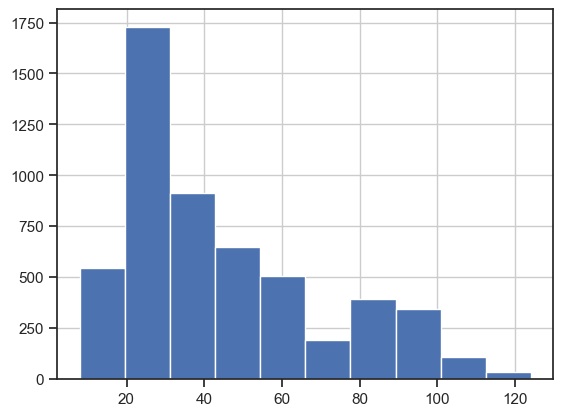

In [54]:
transactions['QUANTITY'].hist()

In [55]:
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0)]

In [56]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,Coffee,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,Coffee,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,Coke,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,Coffee,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,Sparkling Water,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [57]:
bau_data.shape

(3768, 12)

In [58]:
# check for unique
print(np.unique(bau_data['HOLIDAY']))
print(np.unique(bau_data['IS_WEEKEND']))
print(np.unique(bau_data['IS_SCHOOLBREAK']))

['No Holiday']
[0]
[0]


In [59]:
bau_data[bau_data['IS_WEEKEND']==1]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [60]:
bau_data[bau_data['HOLIDAY']!='No Holiday']

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [61]:
transactions.groupby(['CALENDAR_DATE'])['PRICE']

<AxesSubplot: >

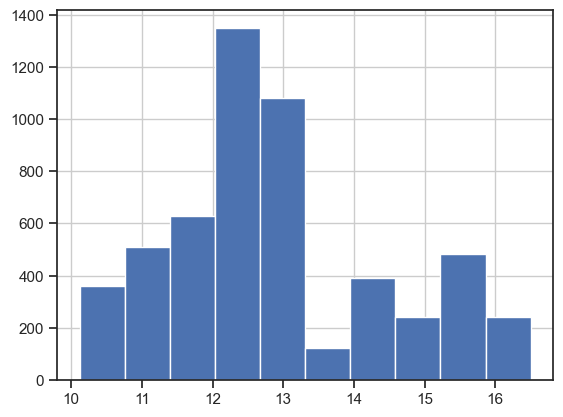

In [62]:
transactions['PRICE'].hist()

In [63]:
bau_data.columns

Index(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE', 'PRICE',
       'QUANTITY', 'YEAR', 'HOLIDAY', 'IS_WEEKEND', 'IS_SCHOOLBREAK',
       'AVERAGE_TEMPERATURE', 'IS_OUTDOOR'],
      dtype='object')

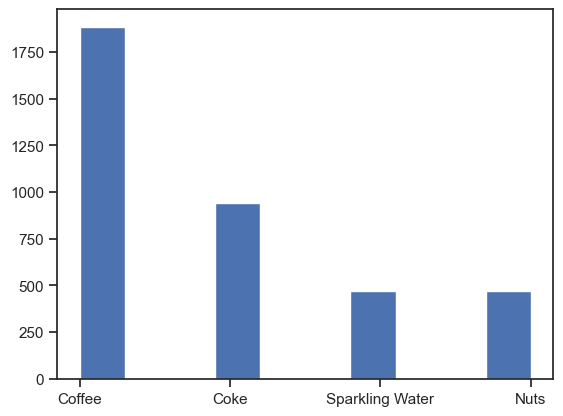

In [64]:
# Data exploration
plt.hist(bau_data.ITEM_NAME)
plt.show()

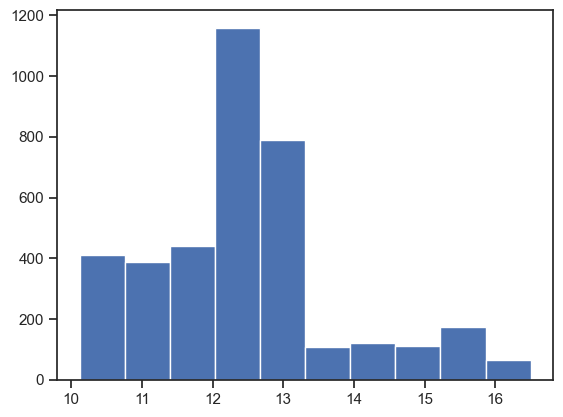

In [65]:
# histogram plot
plt.hist(bau_data.PRICE)
plt.show()

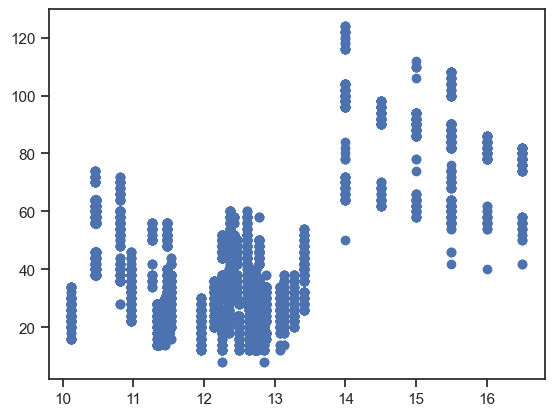

In [66]:
# scatter plot 
plt.scatter(combined_data['PRICE'], combined_data['QUANTITY'])
# plt.scatter(bau_data['PRICE'], bau_data['QUANTITY'])
plt.show()

<AxesSubplot: >

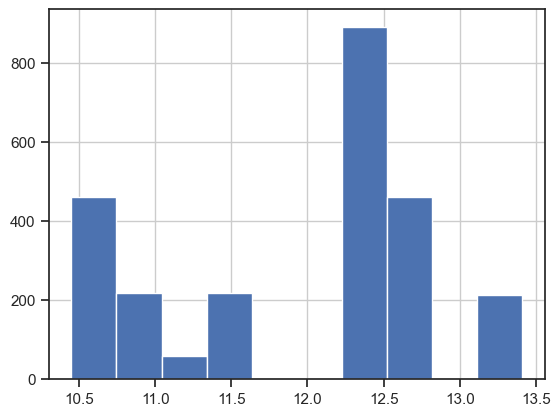

In [67]:
combined_data[combined_data['SELL_ID'] == 2053]['PRICE'].hist()

In [68]:
combined_data['SELL_ID'].unique()

array([1070, 2051, 2052, 2053])

(3348, 12)


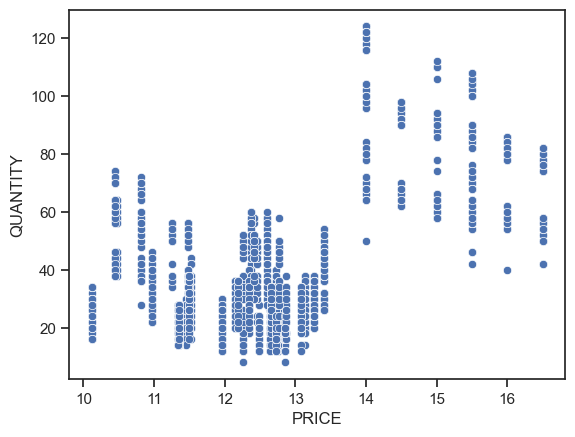

In [69]:
Coffee = combined_data[combined_data['ITEM_NAME'] == 'Coffee']
print(Coffee.shape)
sns.scatterplot(x = Coffee.PRICE, y = Coffee.QUANTITY )
plt.show()

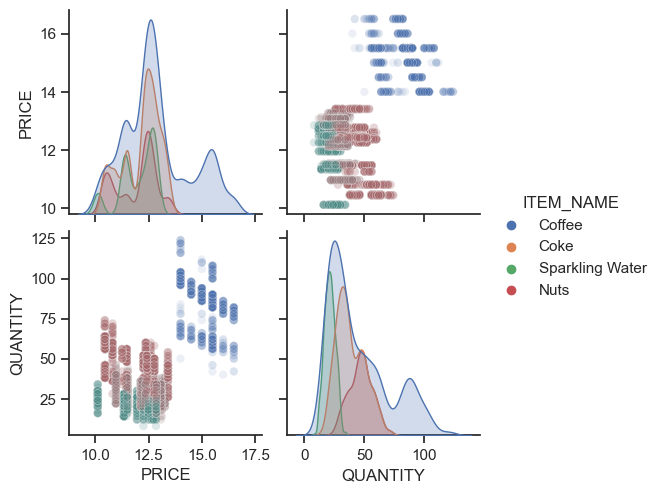

In [70]:
sns.pairplot(combined_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

The price density plot is bimodal. From the graph we can see that for all quantities, as the price is increased the quantity sold is decreased. Although coke is hidden in this view. We xan go ahead and calculate the price elasticities for this.

   SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0     1070              0    Coffee       1/13/12  15.50       100  2012   
1     2051              2    Coffee       1/13/12  12.73        40  2012   
3     2052              2    Coffee       1/13/12  12.75        26  2012   
5     2053              2    Coffee       1/13/12  12.60        58  2012   
8     1070              0    Coffee       1/13/13  15.50        70  2013   

      HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
0  No Holiday           0               0                 26.6           0  
1  No Holiday           0               0                 26.6           0  
3  No Holiday           0               0                 26.6           0  
5  No Holiday           0               0                 26.6           0  
8  No Holiday           1               0                 30.2           0  
(3348, 12)
           SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YE

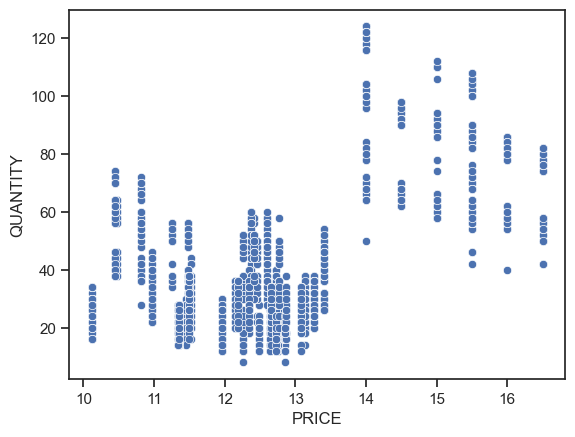

In [71]:
Coffee = combined_data[combined_data['ITEM_NAME'] == 'Coffee']
print(Coffee.head())
print(Coffee.shape)
print(Coffee.describe())
sns.scatterplot(x = Coffee.PRICE, y = Coffee.QUANTITY )
plt.show()

From the above scatter plot it is clearly visible that there must be different types of Coffees being sold. Now let's see the same distributin whenwe differentiate with SELL_ID which indicates if the Coffee was a part of the combo and hence, must be treated separately.

<AxesSubplot: xlabel='PRICE', ylabel='QUANTITY'>

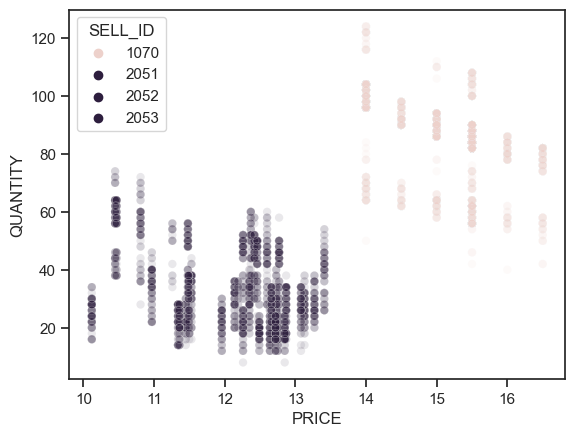

In [72]:
Coffee = combined_data[combined_data['ITEM_NAME'] == 'Coffee']
# print(Coffee)
# print(Coffee.describe())
sns.scatterplot(data = Coffee, x = Coffee.PRICE, y = Coffee.QUANTITY , hue = 'SELL_ID', legend='full', alpha = 0.1)

<AxesSubplot: xlabel='PRICE', ylabel='QUANTITY'>

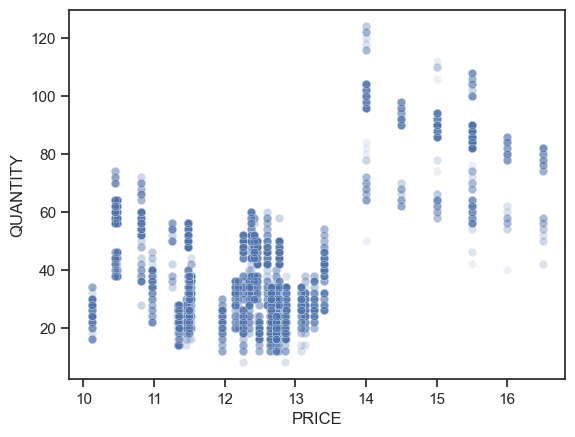

In [73]:
sns.scatterplot(data = combined_data, x = combined_data.PRICE, y = combined_data.QUANTITY, alpha = 0.1)

In [74]:
np.unique(combined_data.SELL_CATEGORY)

array([0, 2])

<AxesSubplot: xlabel='PRICE', ylabel='QUANTITY'>

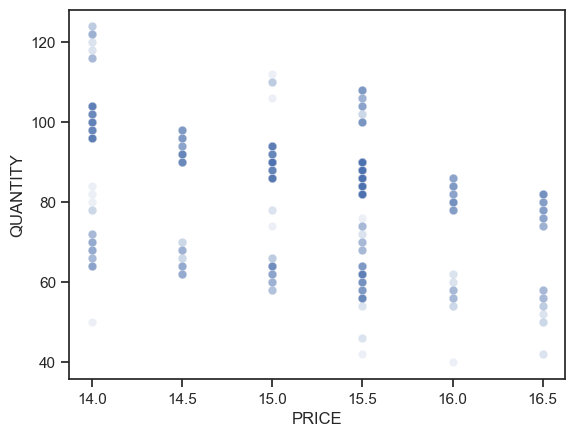

In [75]:
Coffee_1070 = combined_data[(combined_data['ITEM_NAME'] == 'Coffee') & (combined_data['SELL_ID'] == 1070)]

Coffee_1070.head()
Coffee_1070.describe()
sns.scatterplot(data = Coffee_1070, x = Coffee_1070.PRICE, y = Coffee_1070.QUANTITY, alpha = 0.1)

# Modeling

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     153.9
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.45e-32
Time:                        19:15:36   Log-Likelihood:                -3436.0
No. Observations:                 837   AIC:                             6876.
Df Residuals:                     835   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.9859     10.353     20.379      0.0

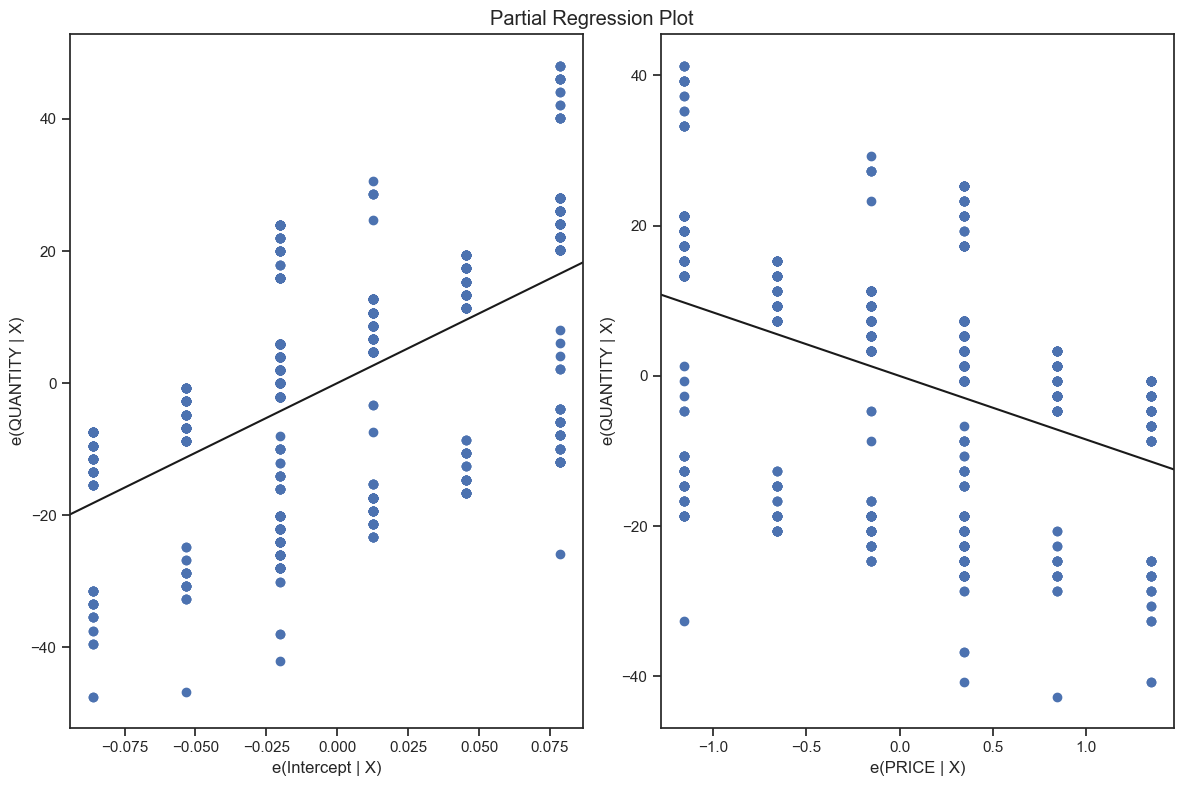

In [76]:
# This is for the combined data
Coffee_model = ols("QUANTITY ~ PRICE", data=Coffee_1070).fit()
print(Coffee_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(Coffee_model, fig=fig)

<AxesSubplot: xlabel='PRICE', ylabel='QUANTITY'>

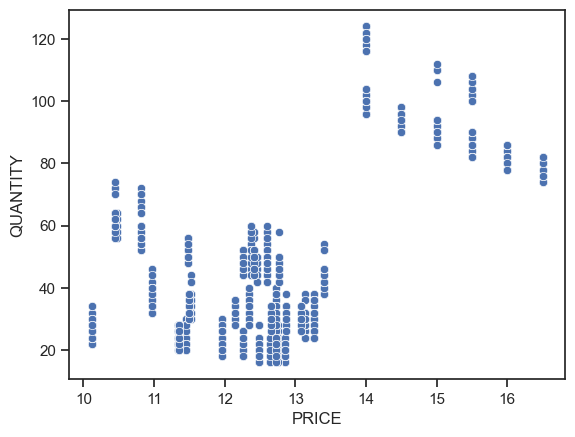

In [77]:
Coffee = bau_data[bau_data['ITEM_NAME'] == 'Coffee'] # for Coffee
Coffee.head()
Coffee.shape
Coffee.describe()
sns.scatterplot(x = Coffee.PRICE, y = Coffee.QUANTITY )

<AxesSubplot: xlabel='PRICE', ylabel='QUANTITY'>

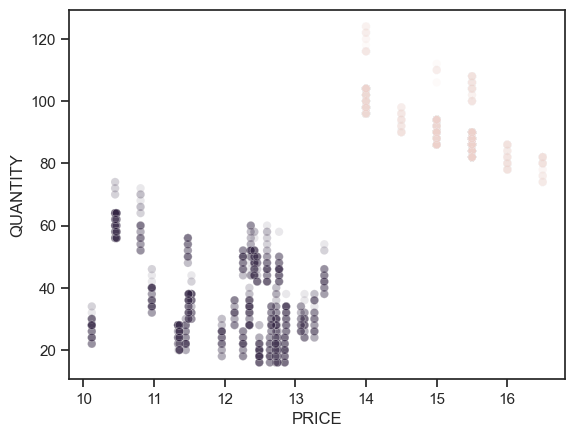

In [78]:
Coffee = bau_data[bau_data['ITEM_NAME'] == 'Coffee']
# print(Coffee)
# print(Coffee.describe())
sns.scatterplot(data = Coffee, x = Coffee.PRICE, y = Coffee.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

In [79]:
# check for unique values
np.unique(bau_data.SELL_ID)

array([1070, 2051, 2052, 2053])

In [80]:
# check for unique values
np.unique(bau_data.SELL_CATEGORY)

array([0, 2])

<AxesSubplot: xlabel='PRICE', ylabel='QUANTITY'>

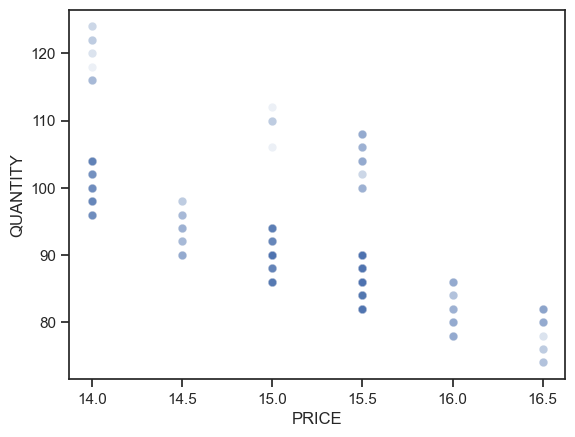

In [81]:
Coffee_1070 = bau_data[(bau_data['ITEM_NAME'] == 'Coffee') & (bau_data['SELL_ID'] == 1070)]

Coffee_1070.head()
Coffee_1070.describe()
sns.scatterplot(data = Coffee_1070, x = Coffee_1070.PRICE, y = Coffee_1070.QUANTITY, alpha = 0.1)

As you can see, the scatter plot is much cleaner. Although there does seem to be 2 separate trends

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     444.2
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           7.16e-70
Time:                        19:15:37   Log-Likelihood:                -1568.2
No. Observations:                 471   AIC:                             3140.
Df Residuals:                     469   BIC:                             3149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.7193      6.702     34.726      0.0

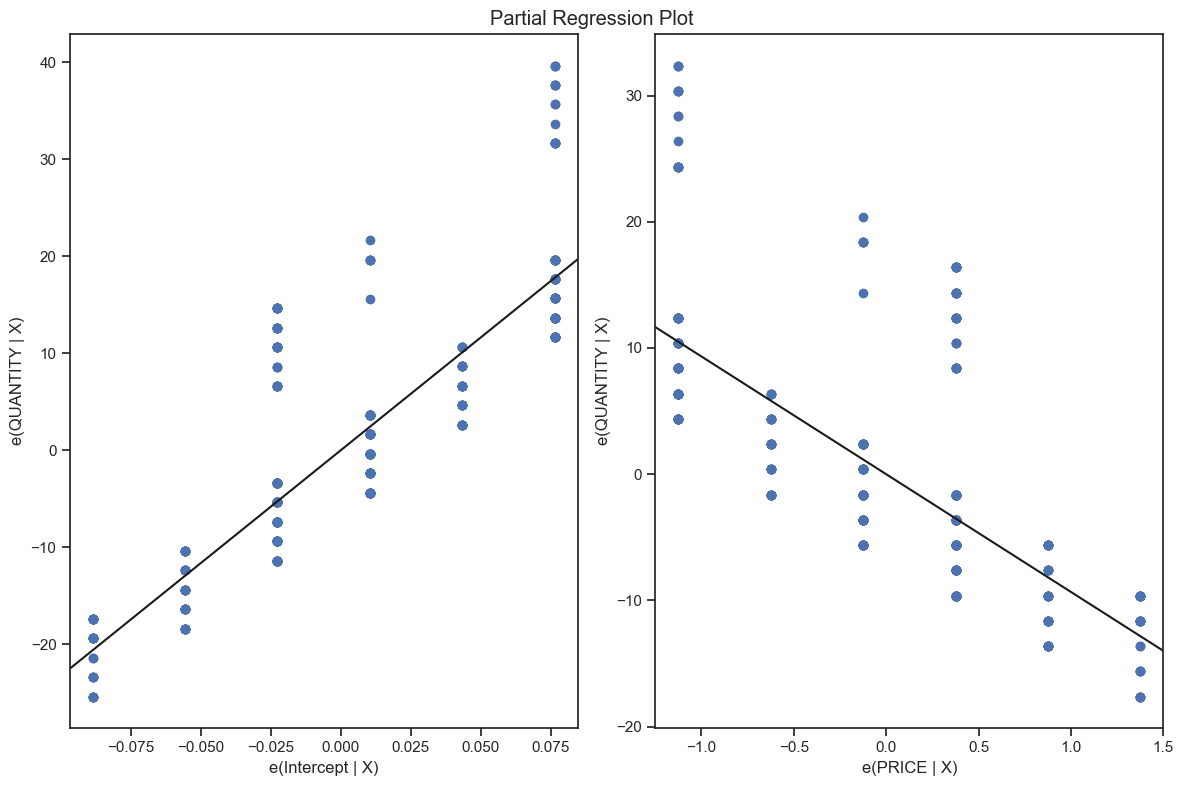

In [82]:
Coffee_model = ols("QUANTITY ~ PRICE", data=Coffee_1070).fit()
print(Coffee_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(Coffee_model, fig=fig)

Let's look at the bau data again to see if there is anything els ein the data we can use to further refine our model.

In [83]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,Coffee,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,Coffee,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,Coke,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,Coffee,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,Sparkling Water,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [84]:
bau2_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0) & (combined_data['IS_OUTDOOR']==1)]

<AxesSubplot: xlabel='PRICE', ylabel='QUANTITY'>

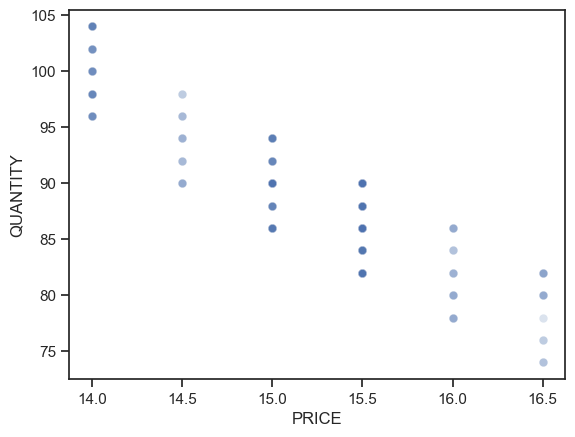

In [85]:
Coffee_1070 = bau2_data[(bau2_data['ITEM_NAME'] == 'Coffee') & (bau2_data['SELL_ID'] == 1070)]

Coffee_1070.head()
Coffee_1070.describe()
sns.scatterplot(data = Coffee_1070, x = Coffee_1070.PRICE, y = Coffee_1070.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          5.51e-153
Time:                        19:15:37   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

<Figure size 1200x800 with 0 Axes>

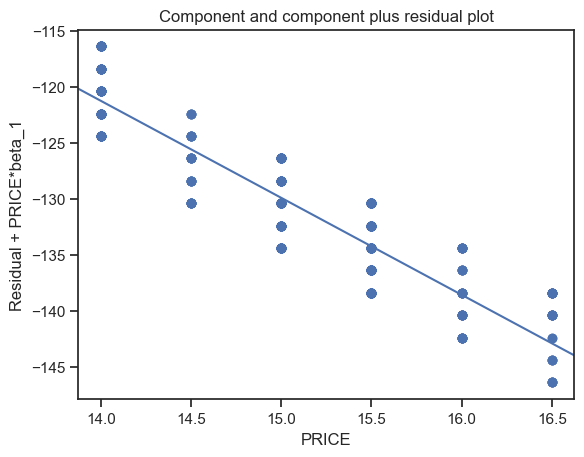

In [86]:
Coffee_model = ols("QUANTITY ~ PRICE", data=Coffee_1070).fit()
print(Coffee_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(Coffee_model, "PRICE")

eval_env: 1


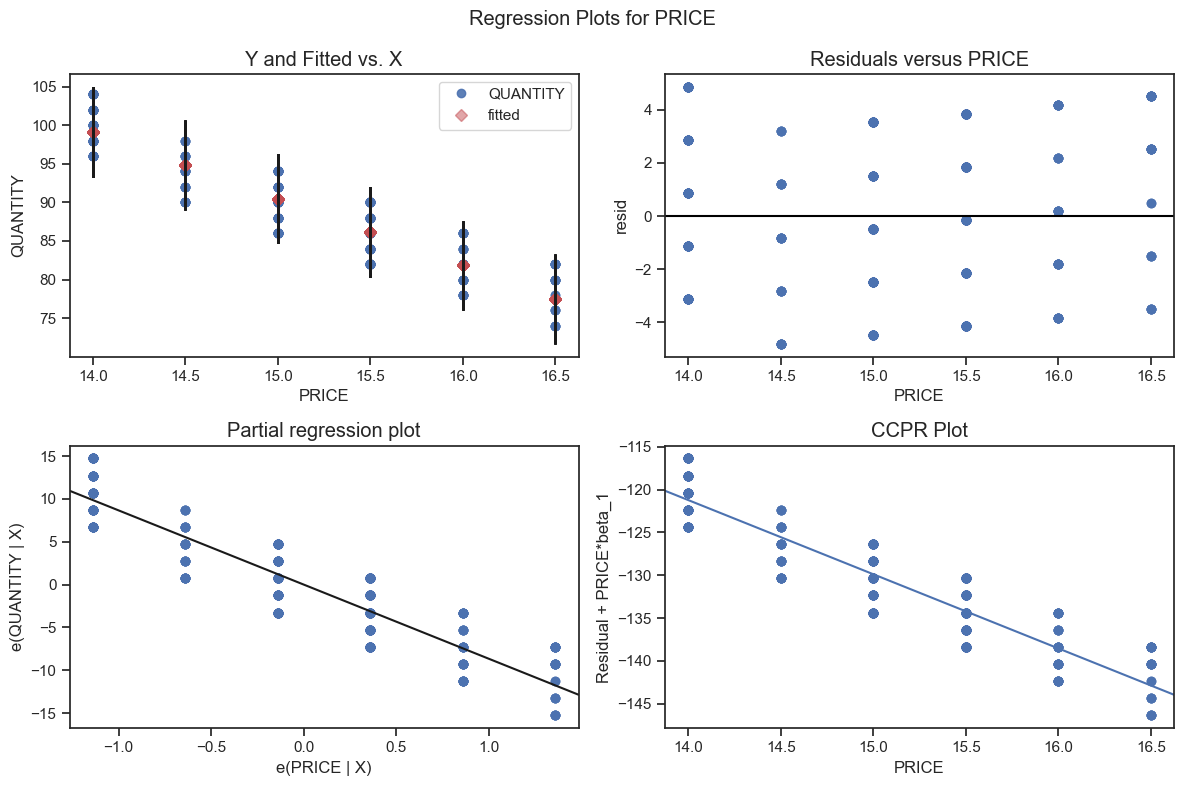

In [87]:
# plot 
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(Coffee_model, "PRICE", fig=fig)

<AxesSubplot: xlabel='PRICE', ylabel='QUANTITY'>

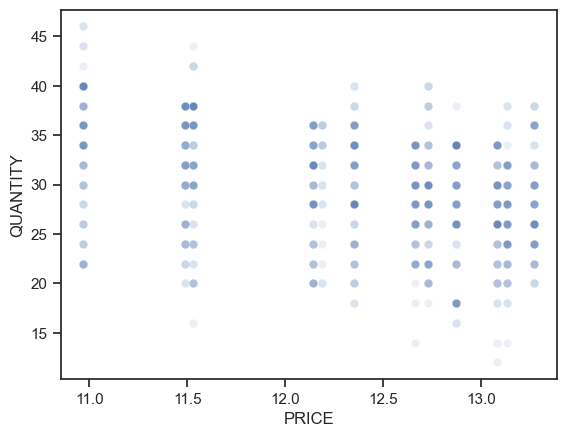

In [88]:
Coffee_2051 = combined_data[(combined_data['ITEM_NAME'] == 'Coffee') & (combined_data['SELL_ID'] == 2051)]

Coffee_2051.head()
Coffee_2051.describe()
sns.scatterplot(data = Coffee_2051, x = Coffee_2051.PRICE, y = Coffee_2051.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           4.45e-27
Time:                        19:15:38   Log-Likelihood:                -2597.8
No. Observations:                 837   AIC:                             5200.
Df Residuals:                     835   BIC:                             5209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.9906      3.184     20.411      0.0

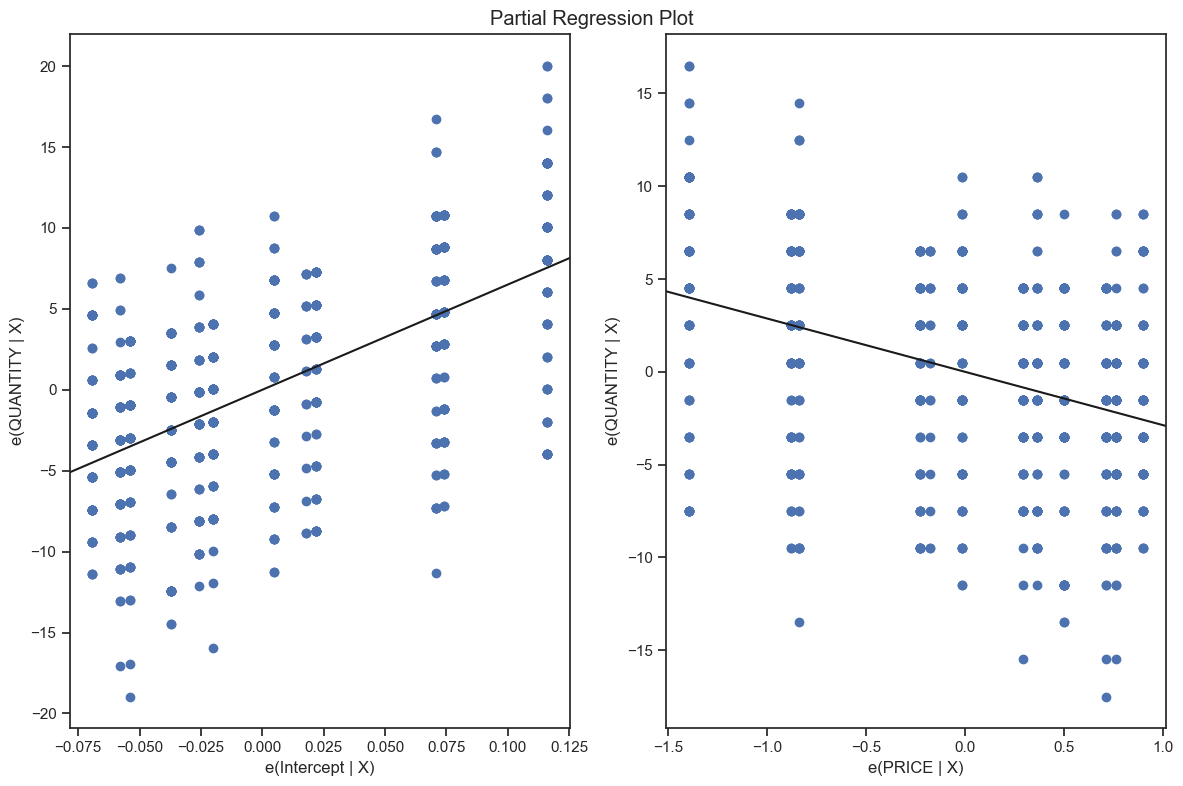

In [89]:
Coffee_model = ols("QUANTITY ~ PRICE", data=Coffee_2051).fit()
print(Coffee_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(Coffee_model, fig=fig)

<AxesSubplot: xlabel='PRICE', ylabel='QUANTITY'>

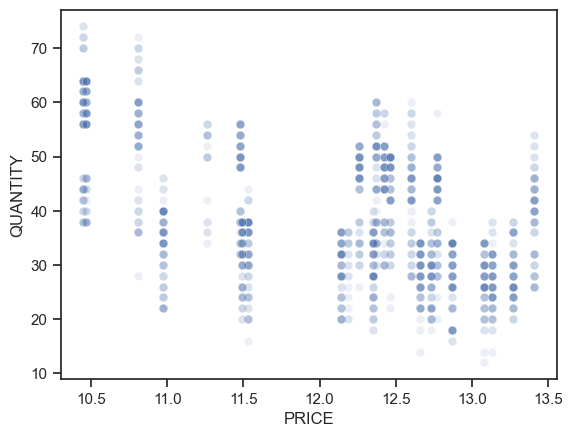

In [90]:
coke = combined_data[combined_data['ITEM_NAME'] == 'Coke'] # for Coke
coke.head()
coke.shape
coke.describe()
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     544.2
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          1.94e-104
Time:                        19:15:39   Log-Likelihood:                -6279.2
No. Observations:                1674   AIC:                         1.256e+04
Df Residuals:                    1672   BIC:                         1.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.1140      3.522     34.100      0.0

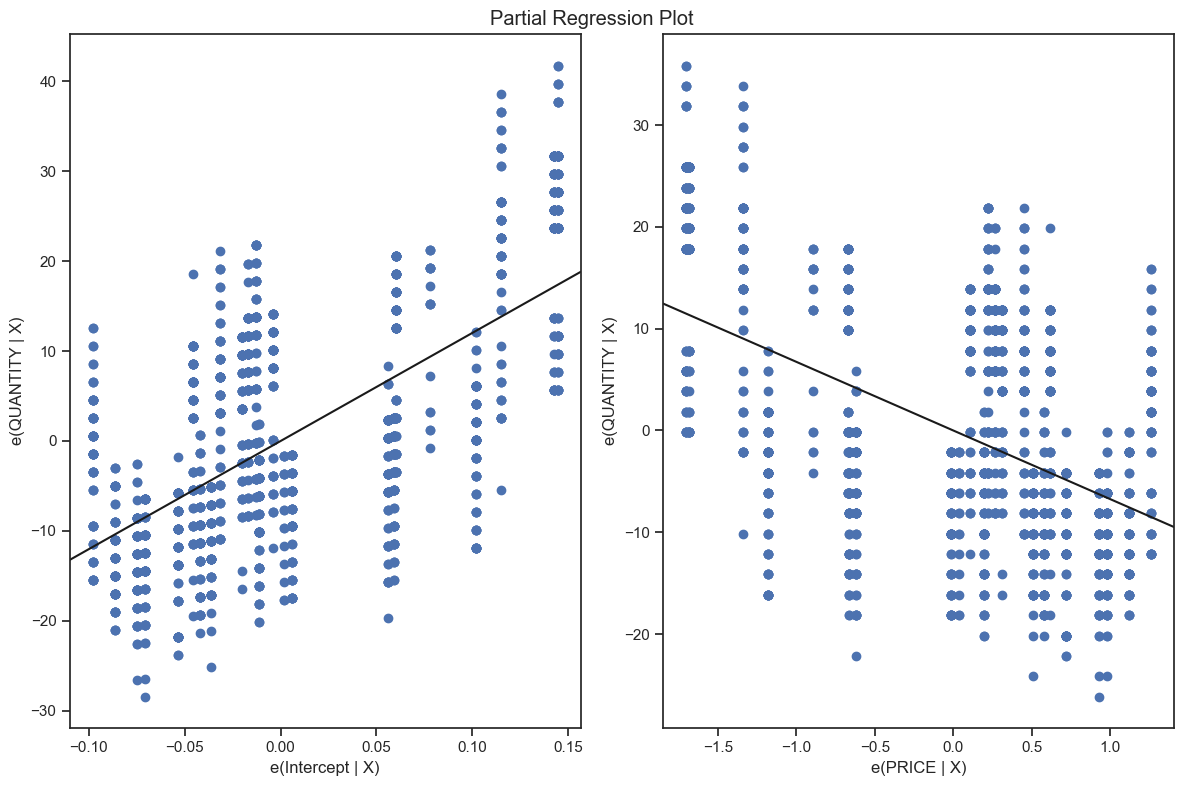

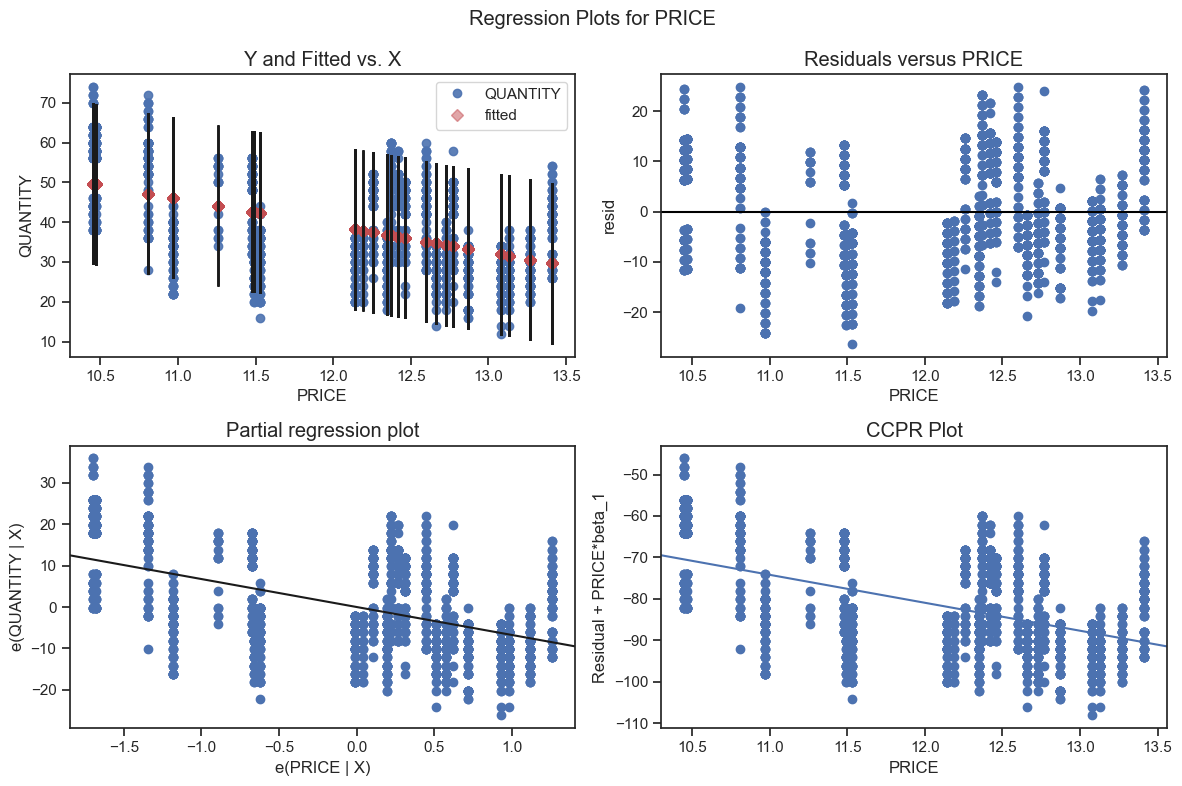

In [91]:
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit() # build and fir the model
print(coke_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coke_model, 'PRICE', fig=fig)

<AxesSubplot: xlabel='PRICE', ylabel='QUANTITY'>

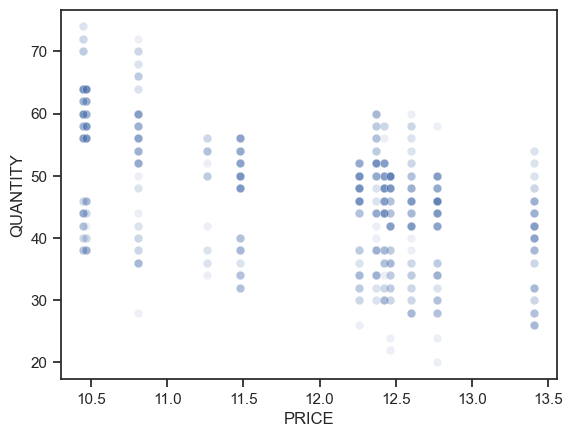

In [92]:
df = combined_data[combined_data['ITEM_NAME'] == 'Nuts'] # for coffee
df.head()
df.shape
df.describe()
sns.scatterplot(x = df.PRICE, y = df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     327.0
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           6.20e-62
Time:                        19:15:40   Log-Likelihood:                -2968.5
No. Observations:                 837   AIC:                             5941.
Df Residuals:                     835   BIC:                             5951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    113.0116      3.673     30.770      0.0

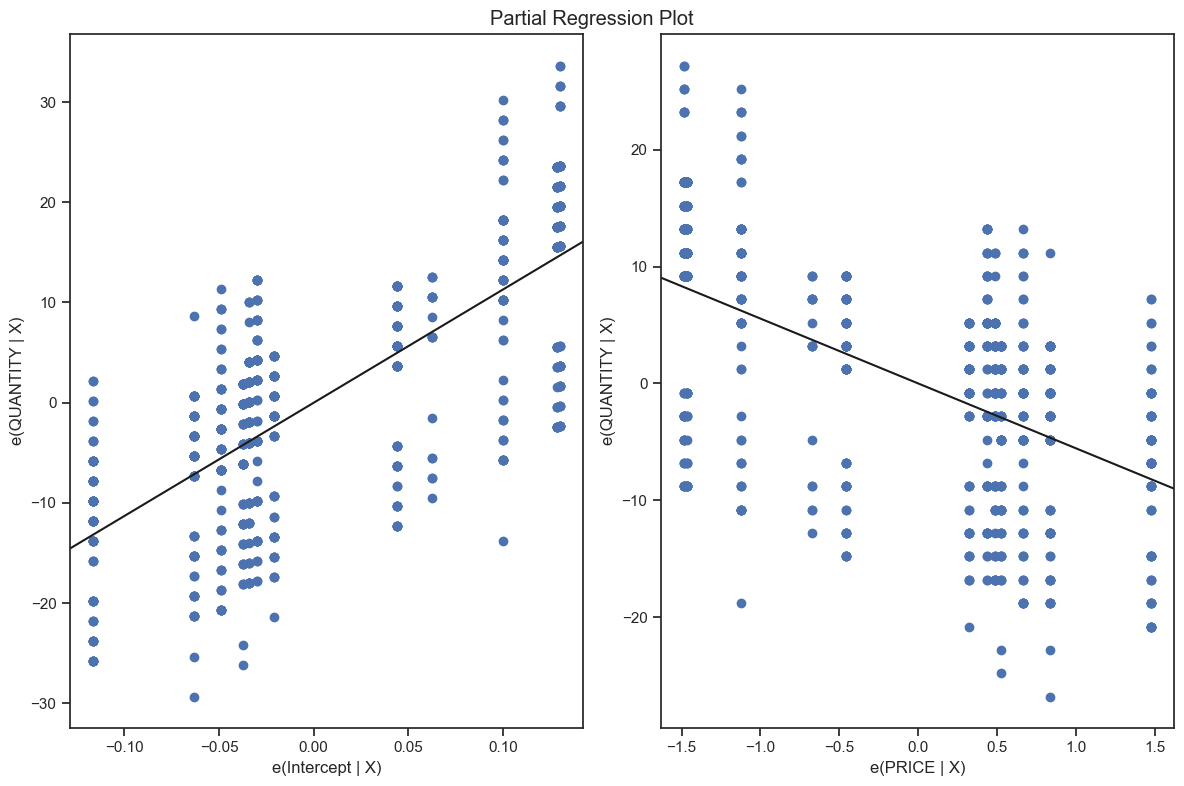

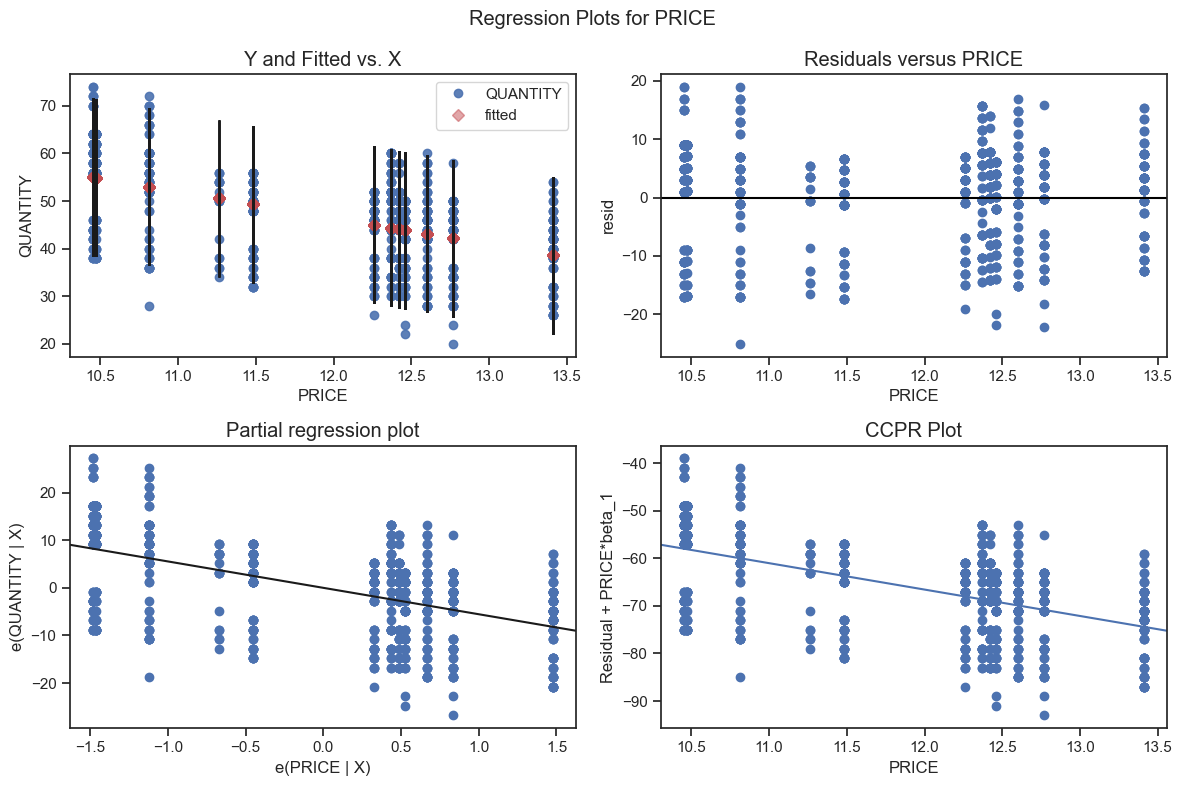

In [93]:
model = ols("QUANTITY ~ PRICE", data=df).fit() # build and fit the model
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

<AxesSubplot: xlabel='PRICE', ylabel='QUANTITY'>

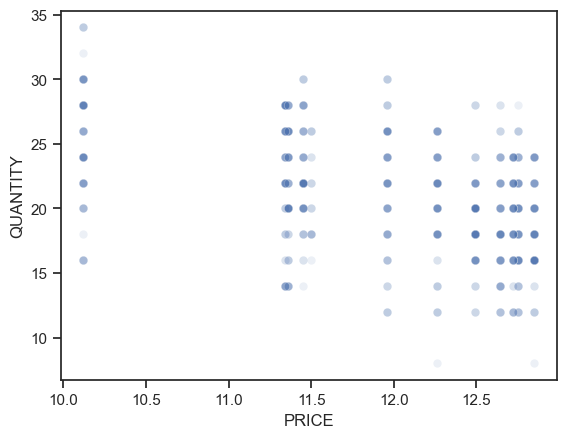

In [94]:
df = combined_data[combined_data['ITEM_NAME'] == 'Sparkling Water'] # for Sparkling Water
df.head()
df.shape
df.describe()
sns.scatterplot(x = df.PRICE, y = df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     228.7
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           7.46e-46
Time:                        19:15:40   Log-Likelihood:                -2347.4
No. Observations:                 837   AIC:                             4699.
Df Residuals:                     835   BIC:                             4708.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.4615      2.025     25.416      0.0

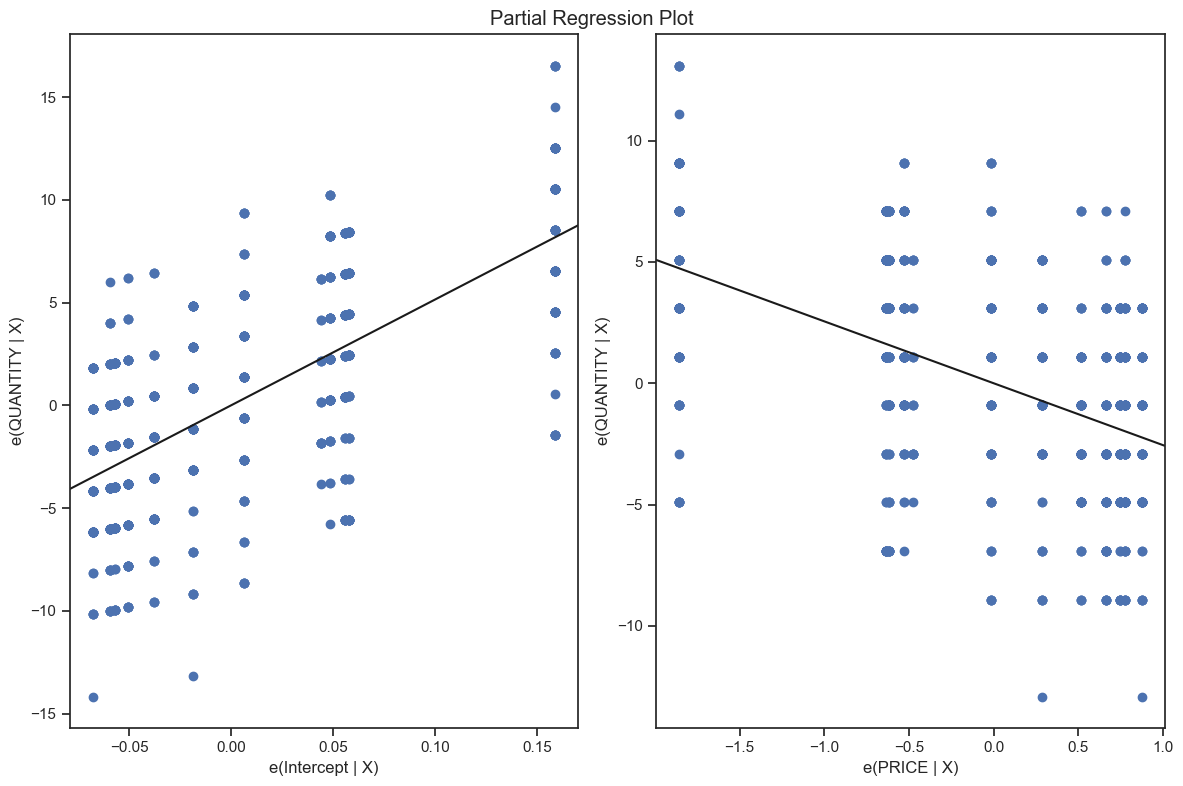

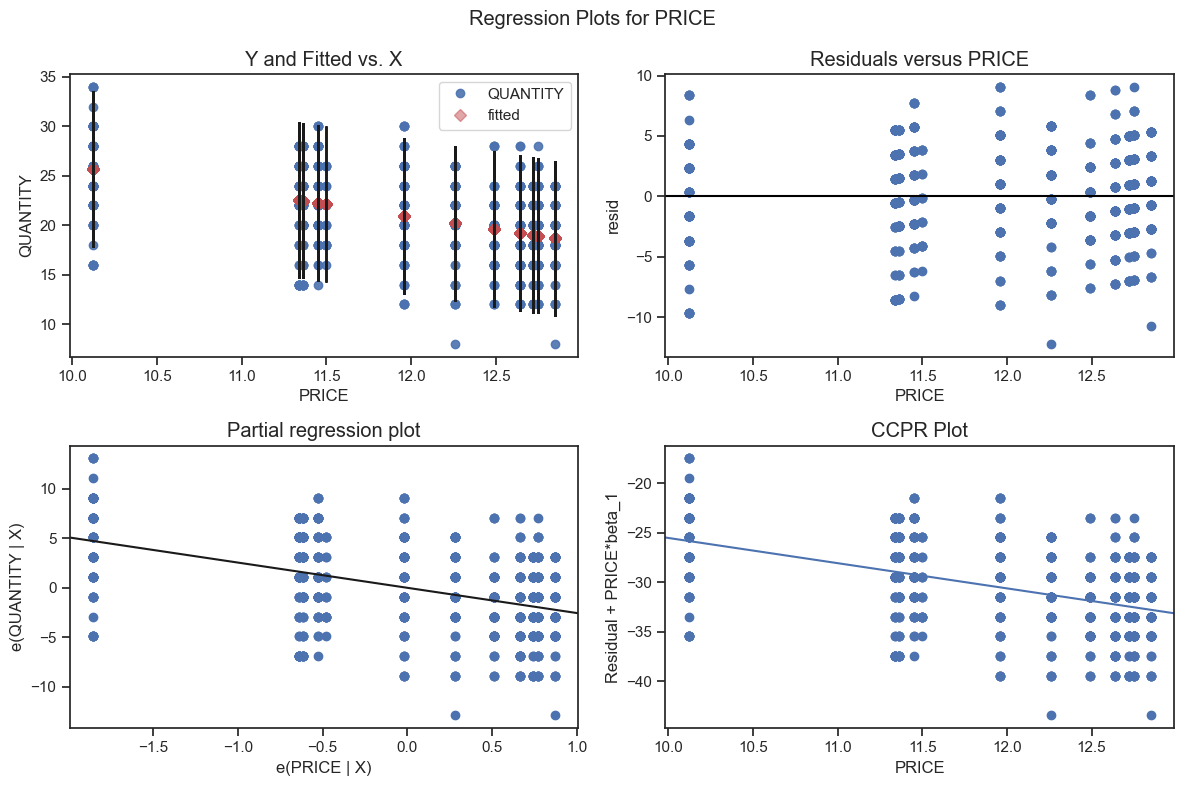

In [95]:
model = ols("QUANTITY ~ PRICE", data=df).fit() # build and fit the model
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

In [96]:
elasticities = {}

In [97]:
# function to create a model and finding elasticity 
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit() # fit the model
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary()) # check for summary 
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig) # plot
    return price_elasticity, model

Price elasticity of the product: -8.658581488470544
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          5.51e-153
Time:                        19:15:41   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


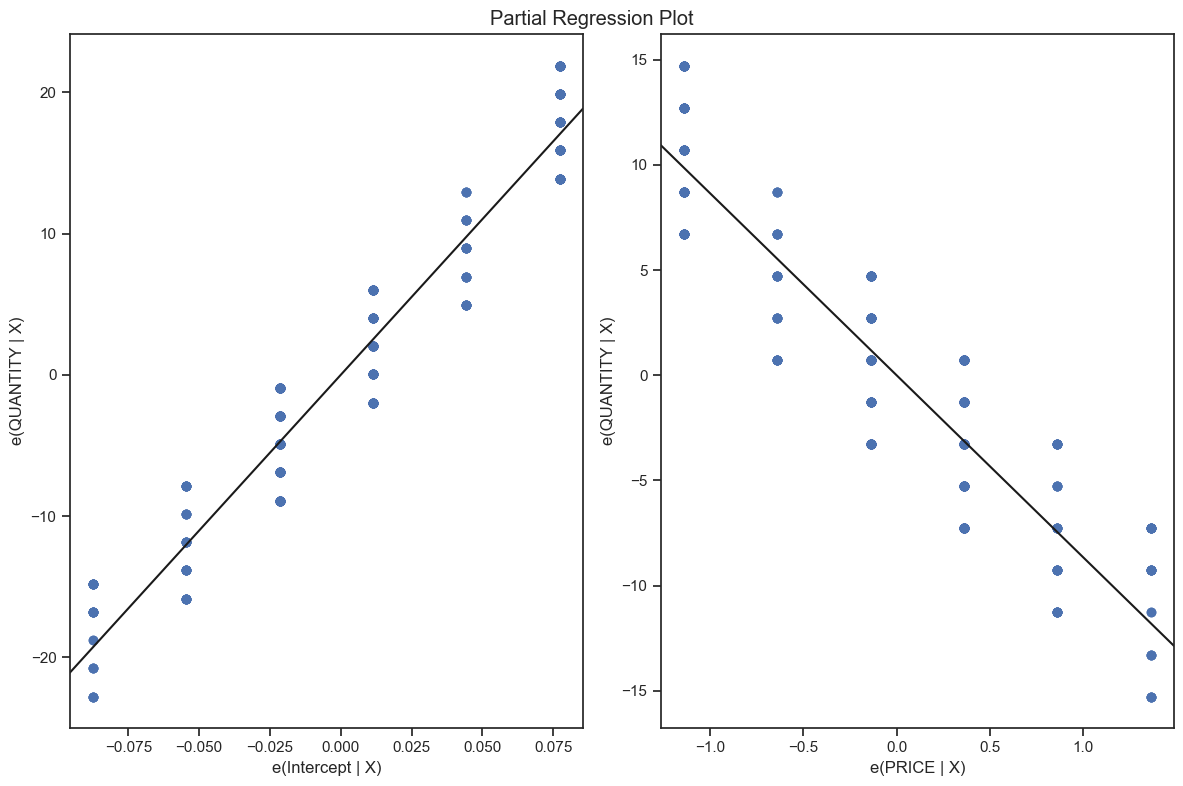

In [98]:
price_elasticity, model_Coffee_1070 = create_model_and_find_elasticity(Coffee_1070)
elasticities['Coffee_1070'] = price_elasticity

Price elasticity of the product: -3.618990615456312
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.34e-58
Time:                        19:15:41   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


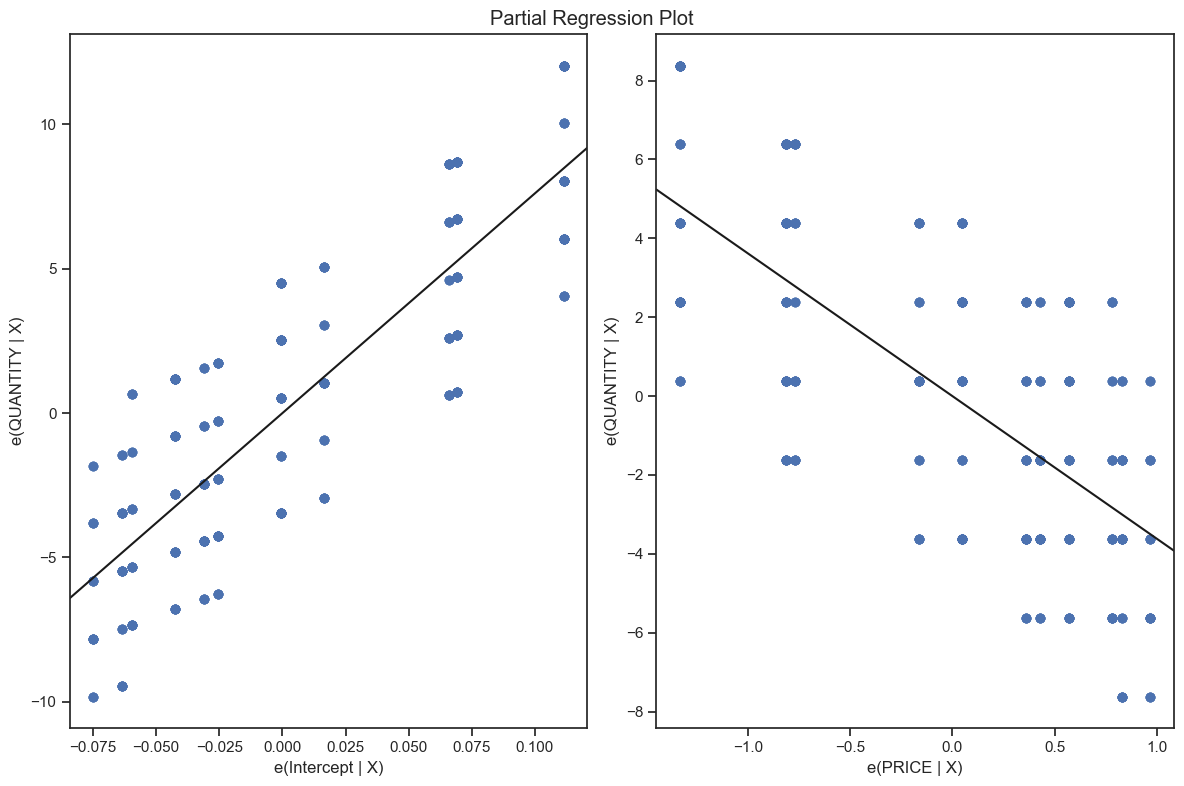

In [99]:
Coffee2051_data = bau2_data[(bau2_data['ITEM_NAME'] == "Coffee") & (bau2_data['SELL_ID'] == 2051)]
elasticities['Coffee_2051'], model_Coffee_2051 = create_model_and_find_elasticity(Coffee2051_data)

Price elasticity of the product: -2.856702984559969
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           5.32e-53
Time:                        19:15:42   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


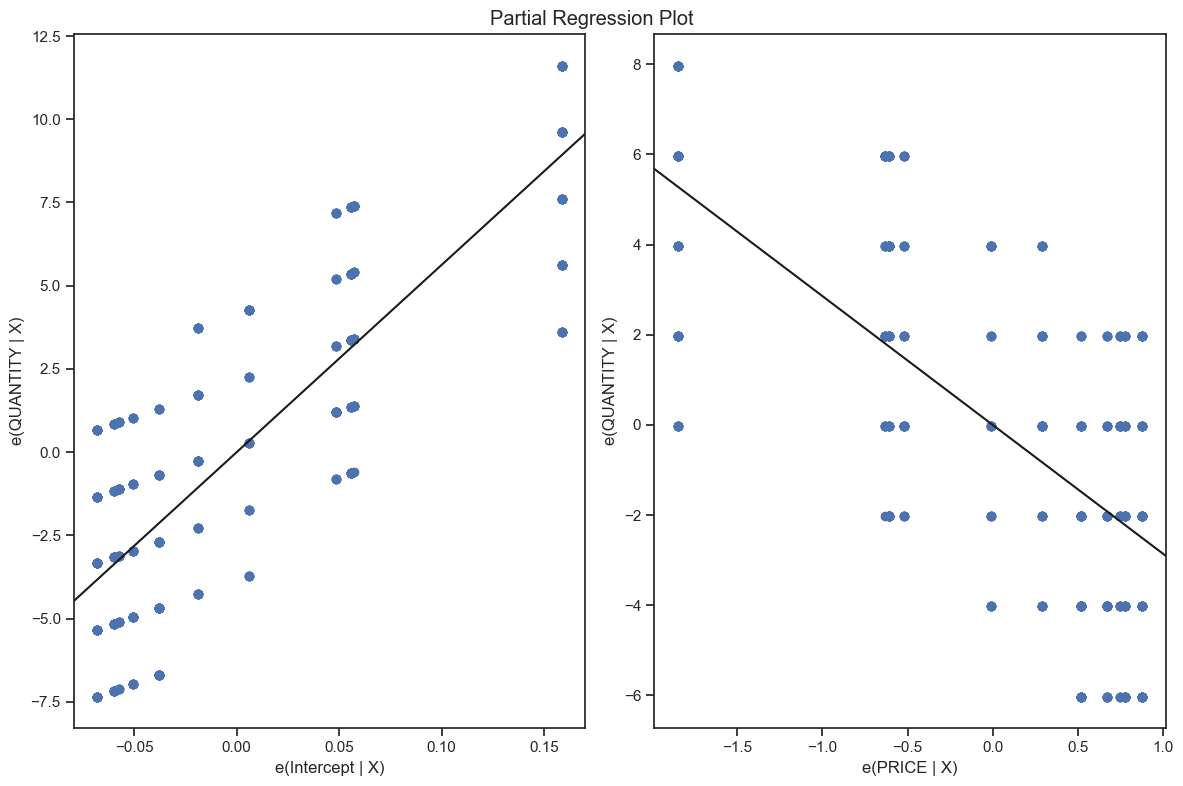

In [100]:
Coffee2052_data = bau2_data[(bau2_data['ITEM_NAME'] == "Coffee") & (bau2_data['SELL_ID'] == 2052)]
elasticities['Coffee_2052'], model_Coffee_2052 = create_model_and_find_elasticity(Coffee2052_data)

Price elasticity of the product: -6.164156666230159
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          3.72e-152
Time:                        19:15:42   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


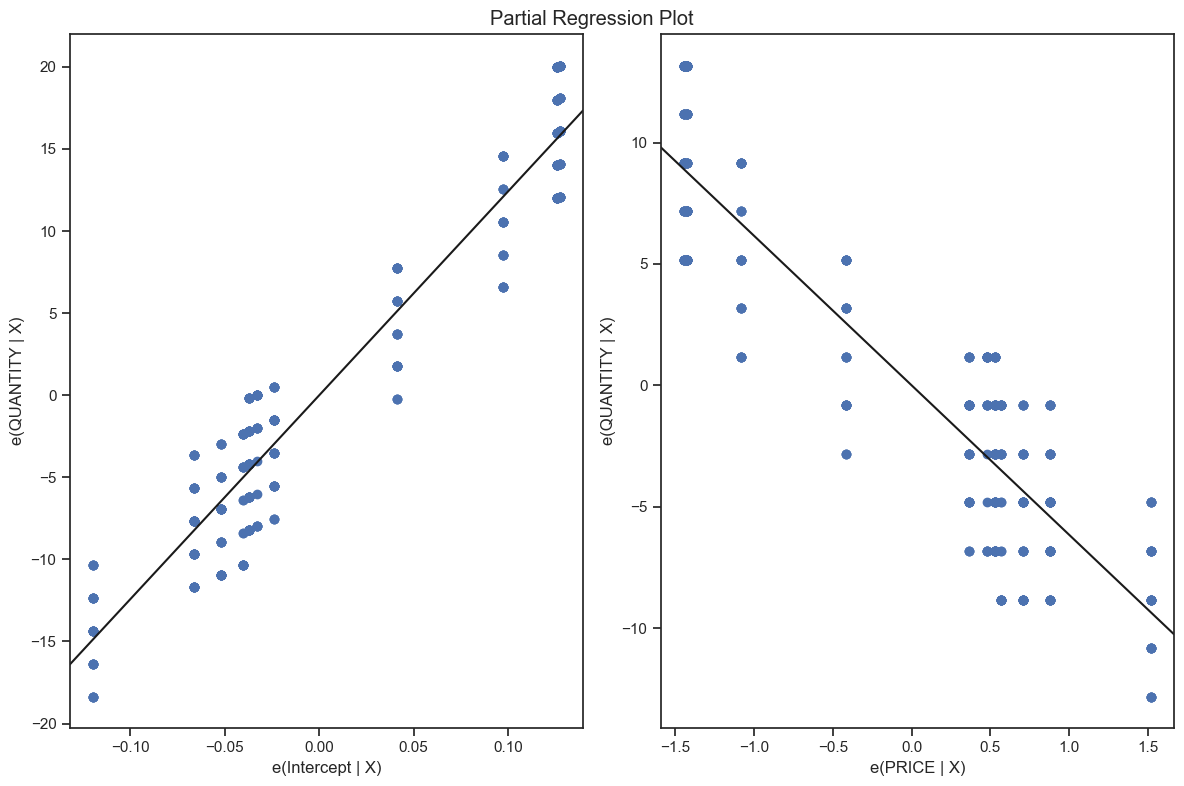

In [101]:
Coffee2053_data = bau2_data[(bau2_data['ITEM_NAME'] == "Coffee") & (bau2_data['SELL_ID'] == 2053)]
elasticities['Coffee_2053'], model_Coffee_2053 = create_model_and_find_elasticity(Coffee2053_data)

Price elasticity of the product: -7.460103485084972
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     466.3
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           2.00e-82
Time:                        19:15:44   Log-Likelihood:                -2994.5
No. Observations:                 832   AIC:                             5993.
Df Residuals:                     830   BIC:                             6002.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


(-7.460103485084972,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x3068bc280>)

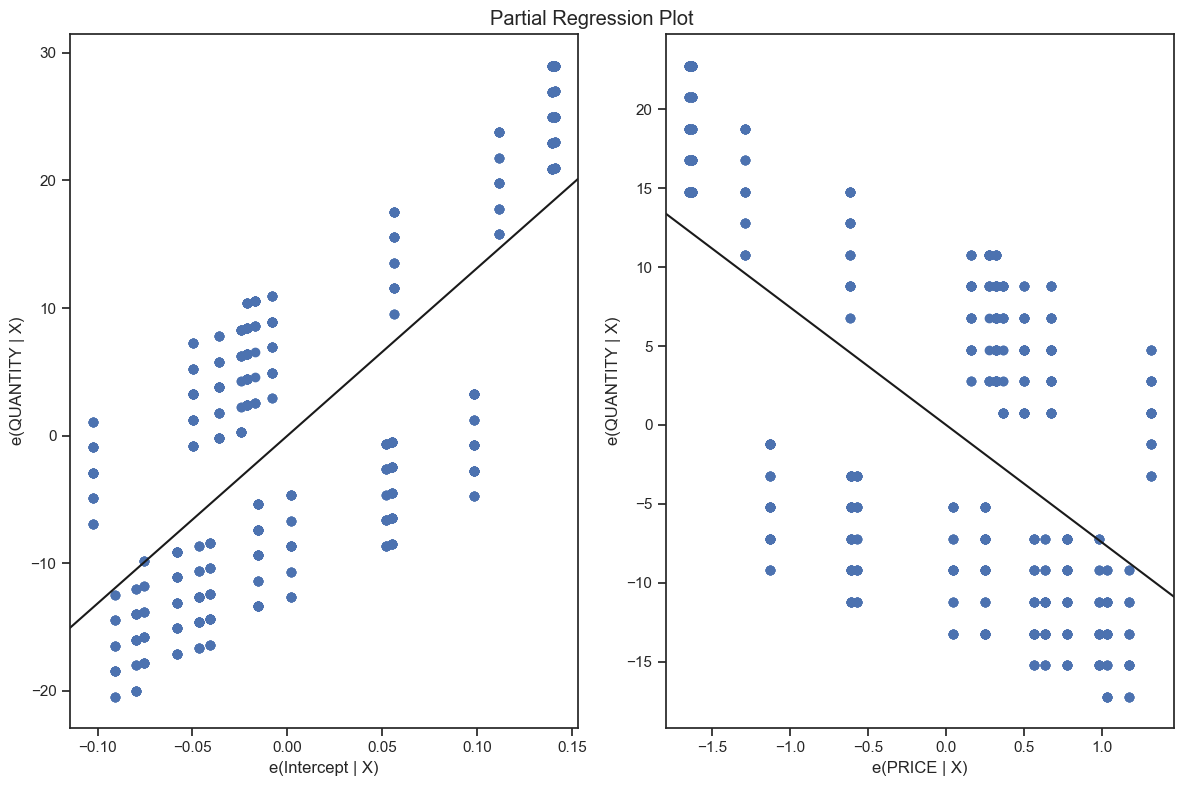

In [102]:
coke_data = bau2_data[bau2_data['ITEM_NAME'] == "Coke"]
create_model_and_find_elasticity(coke_data)

2 coke are available in combo, while 1 is available as single.. So it is likely that the bottom distribution belongs to single purchases of coke. Let's verfy this

In [103]:
coke_data = bau2_data[(bau2_data['ITEM_NAME'] == "Coke") & (bau2_data['SELL_ID'] == 3067)]
elasticities['coke_3067'], model_coke_3067 = create_model_and_find_elasticity(coke_data)

ValueError: zero-size array to reduction operation maximum which has no identity

In [104]:
coke_data

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


Price elasticity of the product: -6.164156666230159
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1784.
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          3.72e-152
Time:                        19:16:05   Log-Likelihood:                -1035.7
No. Observations:                 416   AIC:                             2075.
Df Residuals:                     414   BIC:                             2083.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


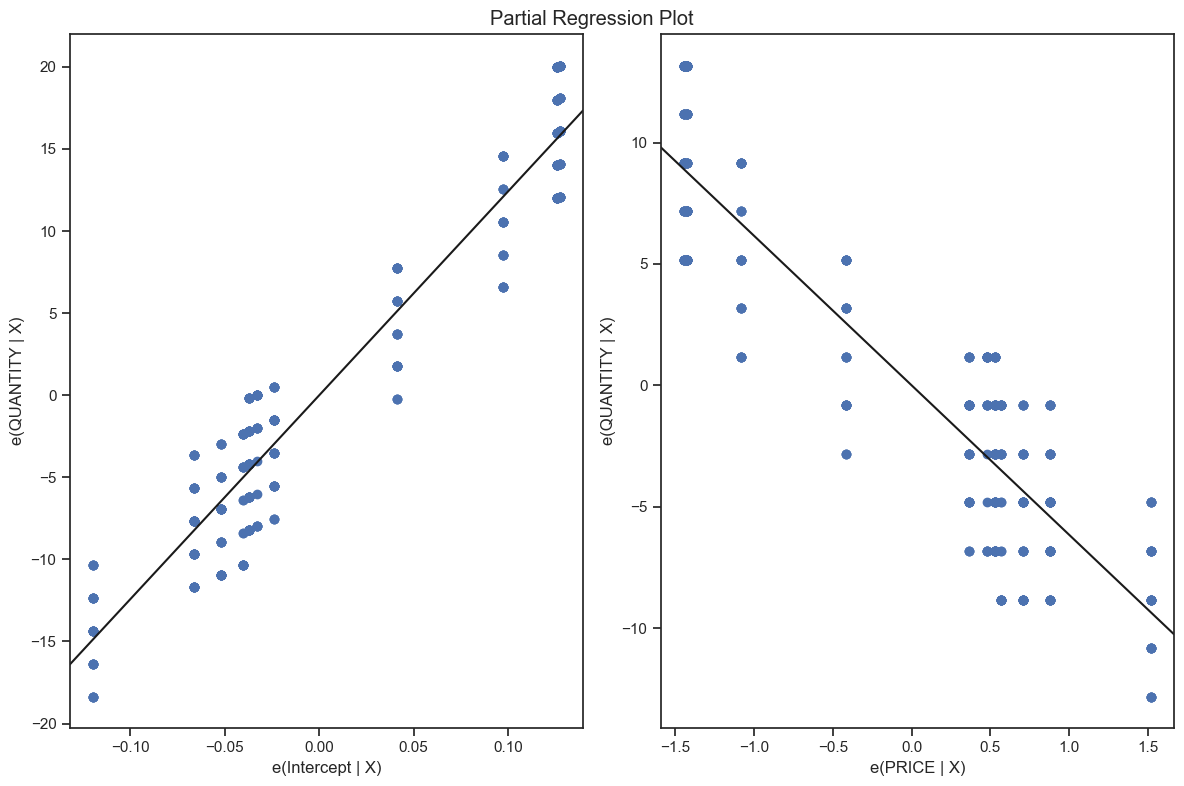

In [105]:
coke_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "Coke") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coke_2053'], model_coke_2053 = create_model_and_find_elasticity(coke_data_2053)

Price elasticity of the product: -3.618990615456312
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     363.3
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.34e-58
Time:                        19:16:05   Log-Likelihood:                -1021.5
No. Observations:                 416   AIC:                             2047.
Df Residuals:                     414   BIC:                             2055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


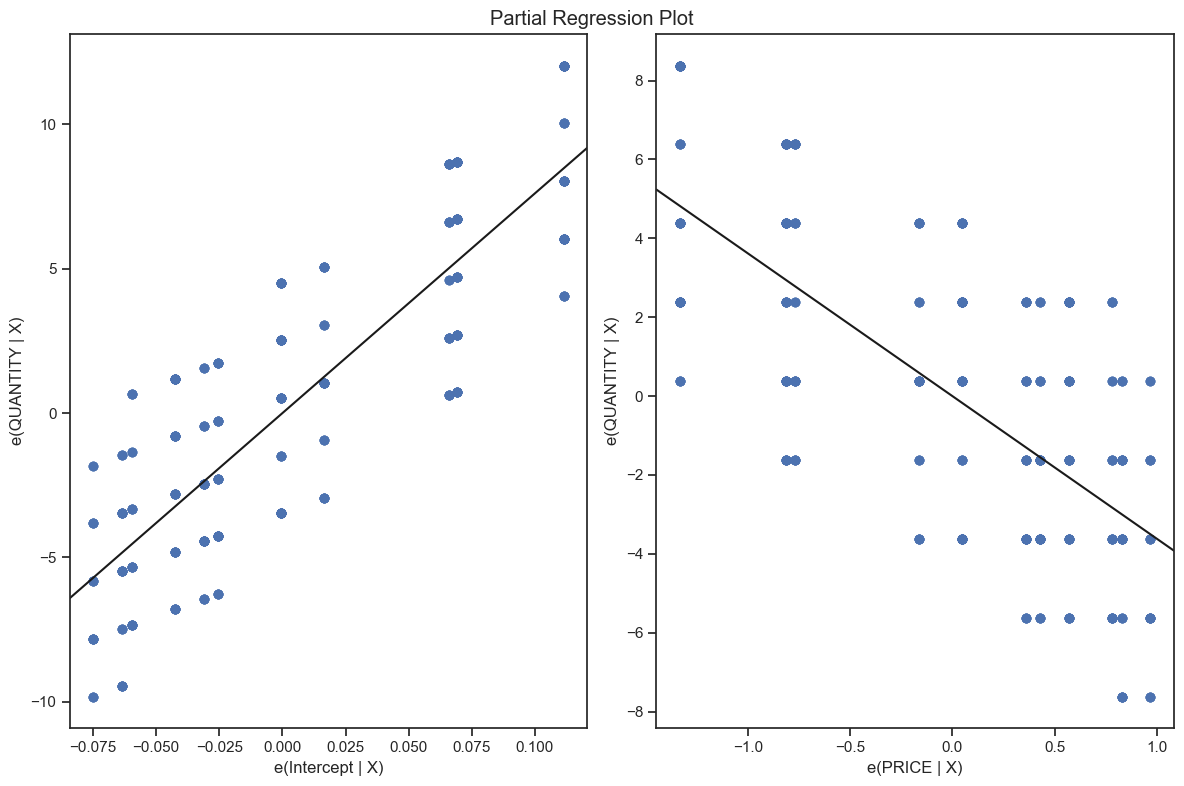

In [106]:
coke_data_2051 = bau2_data[(bau2_data['ITEM_NAME'] == "Coke") & (bau2_data['SELL_ID'] == 2051)]
elasticities['coke_2051'], model_coke_2051 = create_model_and_find_elasticity(coke_data_2051)


Price elasticity of the product: -2.856702984559969
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     316.5
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           5.32e-53
Time:                        19:16:06   Log-Likelihood:                -1014.7
No. Observations:                 416   AIC:                             2033.
Df Residuals:                     414   BIC:                             2041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


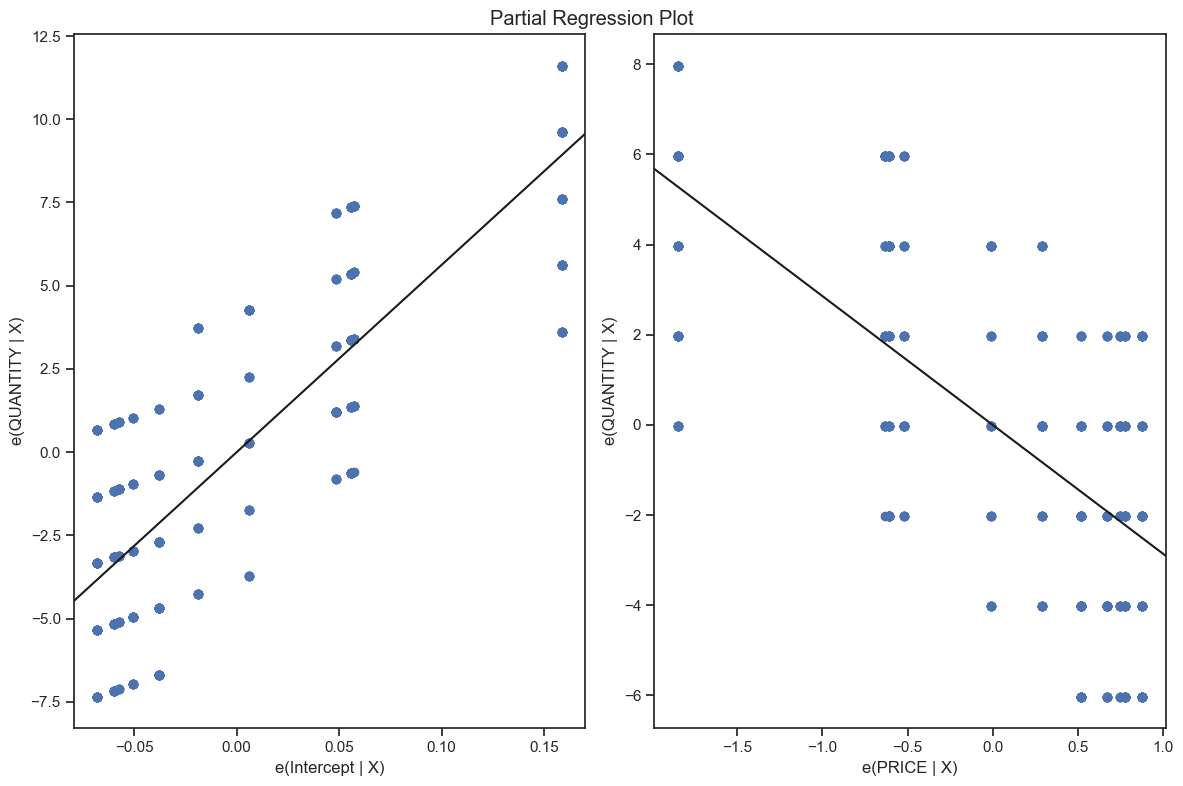

In [107]:
sparkling_water_2052 = bau2_data[(bau2_data['ITEM_NAME'] == "Sparkling Water") & (bau2_data['SELL_ID'] == 2052)]
elasticities['sparkling_water_2052'], model_sparkling_water_2052 = create_model_and_find_elasticity(sparkling_water_2052)

In [108]:
sparkling_water_3028 = bau2_data[(bau2_data['ITEM_NAME'] == "Sparkling Water") & (bau2_data['SELL_ID'] == 3028)]
elasticities['sparkling_water_3028'], model_sparkling_water_3028 = create_model_and_find_elasticity(sparkling_water_3028)

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
nuts_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "Nuts") & (bau2_data['SELL_ID'] == 2053)]
elasticities['nuts_2053'], model_nuts_2053 = create_model_and_find_elasticity(nuts_data_2053)

In [109]:
nuts_data_3055 = bau2_data[(bau2_data['ITEM_NAME'] == "Nuts") & (bau2_data['SELL_ID'] == 3055)]
elasticities['nuts_3055'], model_nuts_3055 = create_model_and_find_elasticity(nuts_data_3055)

ValueError: zero-size array to reduction operation maximum which has no identity

## List in a table the items and their price elasticities

In [110]:
# check the elastcities
elasticities

{'Coffee_1070': -8.658581488470544,
 'Coffee_2051': -3.618990615456312,
 'Coffee_2052': -2.856702984559969,
 'Coffee_2053': -6.164156666230159,
 'coke_2053': -6.164156666230159,
 'coke_2051': -3.618990615456312,
 'sparkling_water_2052': -2.856702984559969}

# Find optimal price for maximum profit

Now, let's take coke (the sell_id was 2051 for the last coke data) and since we do not the buying price of coke, let''s assume it to be a little less than the minimum coke price in the dataset

In [111]:
coke_data = coke_data_2053

In [112]:
# minimum value
coke_data.PRICE.min()

10.45

In [113]:
# maximum value
coke_data.PRICE.max()

13.41

Let's take 9 as the buying price of coke. We now want to be able to set the price of coke to get the maximum profit. PRICE is the selling price

In [114]:
buying_price_coke = 9

$$coke data.PROFIT = (coke data.PRICE - buying price coke) * coke data.QUANTITY$$
Let's see the profit for various price points:

In [115]:
start_price = 9.5
end_price = 20

In [116]:
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])

In [117]:
test['PRICE'] = np.arange(start_price, end_price,0.01)

In [118]:
test['QUANTITY'] = model_coke_2051.predict(test['PRICE'])

In [119]:
test.head()

,PRICE,QUANTITY
0,9.50,41.759021
1,9.51,41.722831
2,9.52,41.686641
3,9.53,41.650451
4,9.54,41.614261


In [120]:
test['PROFIT'] = (test["PRICE"] - buying_price_coke) * test["QUANTITY"]

In [121]:
test['PROFIT']

0       20.879510
1       21.278644
2       21.677053
3       22.074739
4       22.471701
          ...    
1045    43.149228
1046    42.791992
1047    42.434033
1048    42.075350
1049    41.715943
Name: PROFIT, Length: 1050, dtype: float64

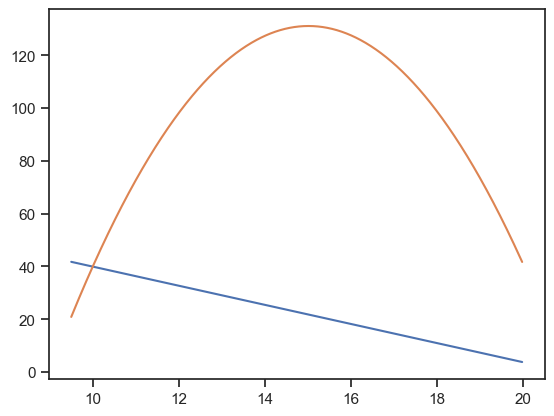

In [122]:
# plot the test 
plt.plot(test['PRICE'],test['QUANTITY'])
plt.plot(test['PRICE'],test['PROFIT'])
plt.show()

Let's find the exact price at which maximum profit is gained:

In [123]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [124]:
test.loc[[ind]]

,PRICE,QUANTITY,PROFIT
552,15.02,21.782193,131.128799


In [125]:
# define a function for finding the optimal price
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1              # start price
    end_price = data.PRICE.min() + 10               # end price
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])  # choose required columns
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])         # make predictions
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])       # plot the results 
    plt.plot(test['PRICE'],test['PROFIT']) 
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit
    

## Calculate the optimal price for all and list in table

In [126]:
optimal_price = {}
buying_price = 9

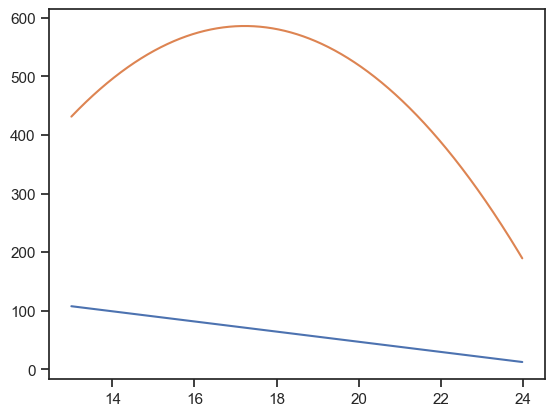

In [127]:
optimal_price['Coffee_1070'] = find_optimal_price(Coffee_1070, model_Coffee_1070, buying_price)

In [128]:
optimal_price

{'Coffee_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572}

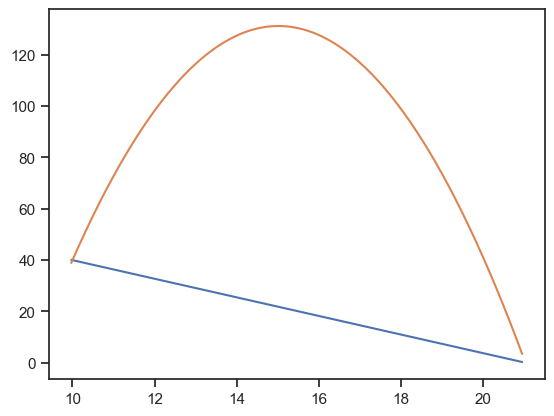

In [129]:
optimal_price['Coffee_2051'] = find_optimal_price(Coffee2051_data, model_Coffee_2051, buying_price)

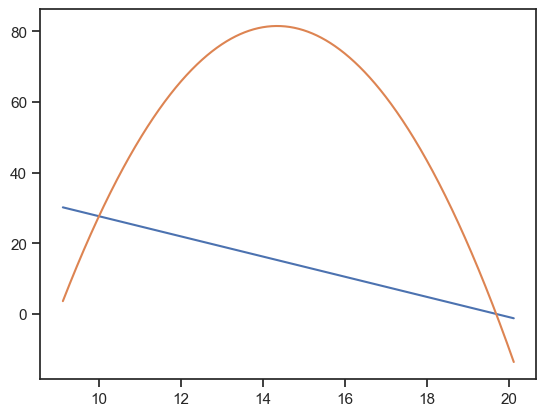

In [130]:
optimal_price['Coffee_2052'] = find_optimal_price(Coffee2052_data, model_Coffee_2052, buying_price)

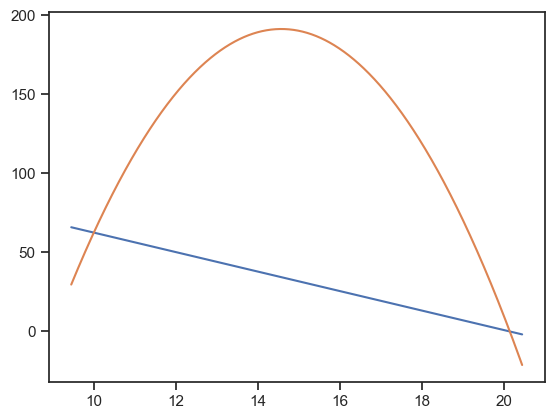

In [131]:
optimal_price['Coffee_2053'] = find_optimal_price(Coffee2053_data, model_Coffee_2053, buying_price)

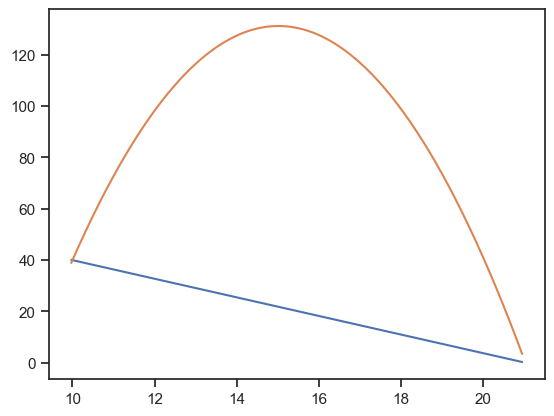

In [132]:
optimal_price['coke_2051'] = find_optimal_price(coke_data_2051, model_coke_2051, buying_price)

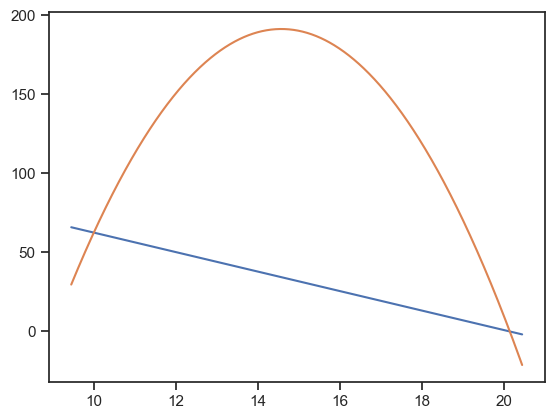

In [133]:
optimal_price['coke_2053'] = find_optimal_price(coke_data_2053, model_coke_2053, buying_price)

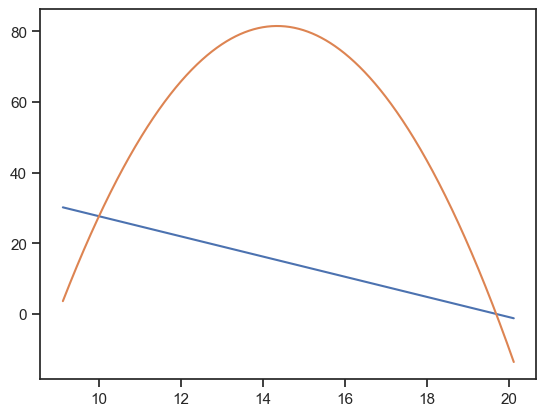

In [134]:
optimal_price['sparkling_water_2052'] = find_optimal_price(sparkling_water_2052, model_sparkling_water_2052, buying_price)

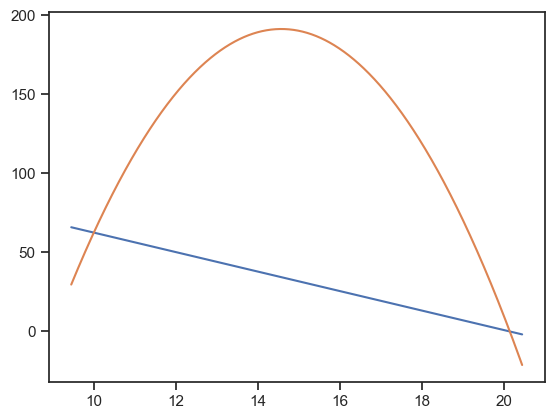

In [135]:
optimal_price['coffee_2053'] = find_optimal_price(Coffee2053_data, model_Coffee_2053, buying_price)

In [136]:
optimal_price

{'Coffee_1070':      PRICE   QUANTITY      PROFIT
 422  17.22  71.259194  585.750572,
 'Coffee_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799,
 'Coffee_2052':      PRICE   QUANTITY     PROFIT
 522  14.34  15.259215  81.484211,
 'Coffee_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825,
 'coke_2051':      PRICE   QUANTITY      PROFIT
 505  15.02  21.782193  131.128799,
 'coke_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825,
 'sparkling_water_2052':      PRICE   QUANTITY     PROFIT
 522  14.34  15.259215  81.484211,
 'coffee_2053':      PRICE   QUANTITY      PROFIT
 512  14.57  34.329951  191.217825}

In [137]:
coke_data_2051.PRICE.describe()

count    416.000000
mean      12.301562
std        0.730620
min       10.970000
25%       11.530000
50%       12.350000
75%       12.870000
max       13.270000
Name: PRICE, dtype: float64

# Conclusion

This is the price the Retail store should set on it's item to earn maximum profit based on it's previous sales data. It is important to note that this is on a normal day. On 'other' days such as a holiday, or an event taking place have a different impact on customer buying behaviours and pattern. Usually an increase in consumption is seen on such days. These must be treated separately. Similarly, it is important to remove any external effects other than price that will affect the purchase behaviours of customers including the datapoints when the item was on discount.

Once, the new prices are put up, it is important to continuously monitor the sales and profit. If this method of pricing is a part of a rpoduct, a dashboard can be created for the purpose of monitoring these items and calculating the lift in the profit.

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1804.
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          5.51e-153
Time:                        19:15:37   Log-Likelihood:                -1038.8
No. Observations:                 416   AIC:                             2082.
Df Residuals:                     414   BIC:                             2090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    220.3600      3.090     71.322      0.0

<Figure size 1200x800 with 0 Axes>

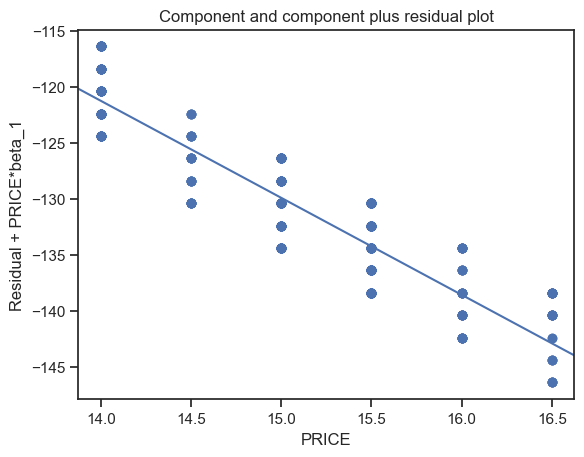

In [ ]:
Coffee_model = ols("QUANTITY ~ PRICE", data=Coffee_1070).fit()
print(Coffee_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(Coffee_model, "PRICE")